# ITU-T P.1203 Model Fine-Tuning

Based on our subjective testing data

# Notes

**07.11**
Previously the bitrate was used in mbits/second
Now the p1203 model clearly uses kbits/second

I am collecting all video bitrates in bytes and then converting them to mbits/second, before multiplying them by 1000 to get kbits/second
I am also only storing the bitrate in kbits to avoid confusion

The way to get the megabits values is:
1. get the size of the bin file in bytes (or kilobytes)
2. convert it to megabits by dividing by 125000
3. divide it by 10 (since the bin file is for 10-seconds) to get megabits / second
4. multiply it by 1000 to get kbit/s
All of our sequences are 10-second sequences, thus we divide by 10

The video bitrates are as follows:

#### VPCC
```
BlueSpin-r1.bin: 14000.33 kilobits
BlueSpin-r2.bin: 18358.77 kilobits
BlueSpin-r3.bin: 25381.74 kilobits
BlueSpin-r4.bin: 60218.56 kilobits
BlueSpin-r5.bin: 100957.13 kilobits
CasualSquat-r1.bin: 20028.41 kilobits
CasualSquat-r2.bin: 31350.91 kilobits
CasualSquat-r3.bin: 53280.41 kilobits
CasualSquat-r4.bin: 156102.30 kilobits
CasualSquat-r5.bin: 248934.89 kilobits
FlowerDance-r1.bin: 21305.45 kilobits
FlowerDance-r2.bin: 33934.77 kilobits
FlowerDance-r3.bin: 57028.55 kilobits
FlowerDance-r4.bin: 182492.95 kilobits
FlowerDance-r5.bin: 314833.07 kilobits
```

#### GPCC OCTREE PREDLIFT
```
BlueSpin	GPCC_OCTREE	r03: 13660.416000000001
BlueSpin	GPCC_OCTREE	r04: 46060.824
BlueSpin	GPCC_OCTREE	r05: 109881.408
FlowerDance	GPCC_OCTREE	r03: 19756.144
FlowerDance	GPCC_OCTREE	r04: 86391.176
FlowerDance	GPCC_OCTREE	r05: 250931.52000000002
CasualSquat	GPCC_OCTREE	r03: 17925.864
CasualSquat	GPCC_OCTREE	r04: 80444.512
CasualSquat	GPCC_OCTREE	r05: 236568.048
ReadyForWinter	GPCC_OCTREE	r03: 15638.336000000001
ReadyForWinter	GPCC_OCTREE	r04: 52875.8
ReadyForWinter	GPCC_OCTREE	r05: 134155.064
```

#### GPCC TRISOUP RAHT
```
BlueSpin	GPCC_TRISOUP	r01: 9943.304
BlueSpin	GPCC_TRISOUP	r02: 21686.392
BlueSpin	GPCC_TRISOUP	r03: 48736.448000000004
BlueSpin	GPCC_TRISOUP	r04: 109806.632
FlowerDance	GPCC_TRISOUP	r01: 30262.008
FlowerDance	GPCC_TRISOUP	r02: 80246.72
FlowerDance	GPCC_TRISOUP	r03: 190894.312
FlowerDance	GPCC_TRISOUP	r04: 399077.4
CasualSquat	GPCC_TRISOUP	r01: 38344.168
CasualSquat	GPCC_TRISOUP	r02: 92561.18400000001
CasualSquat	GPCC_TRISOUP	r03: 197146.93600000002
CasualSquat	GPCC_TRISOUP	r04: 387772.944
ReadyForWinter	GPCC_TRISOUP	r01: 9973.616
ReadyForWinter	GPCC_TRISOUP	r02: 22938.344
ReadyForWinter	GPCC_TRISOUP	r03: 60035.200000000004
ReadyForWinter	GPCC_TRISOUP	r04: 142426.24
```

#### OLD VIDEOS
```
longdress-r1.bin: 45330.51 kilobits
longdress-r3.bin: 137209.71 kilobits
longdress-r5.bin: 456825.40 kilobits
loot-r1.bin: 22223.74 kilobits
loot-r3.bin: 54941.94 kilobits
loot-r5.bin: 162842.81 kilobits
ReadyForWinter-r1.bin: 15823.20 kilobits
ReadyForWinter-r2.bin: 20687.30 kilobits
ReadyForWinter-r3.bin: 28919.76 kilobits
ReadyForWinter-r4.bin: 74742.73 kilobits
ReadyForWinter-r5.bin: 132748.28 kilobits
redandblack-r1.bin: 33068.13 kilobits
redandblack-r3.bin: 73753.55 kilobits
redandblack-r5.bin: 223673.06 kilobits
soldier-r1.bin: 42745.16 kilobits
soldier-r3.bin: 113102.48 kilobits
soldier-r5.bin: 344626.97 kilobits
```

# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

/home/shivi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Universal Data

## Video Metadata

In [2]:
# User QoE Scores CSV File
# qoe_csv_filepath = './results/test_scores.csv'
qoe_csv_filepath = "./results/test_scores_only_compeq.csv"
results_folder = "./results_shivi"
error_data_folder = "./Error_Data"


# Bitrate and resolution information for all the videos in KBPS

# New aka ComPEQ-MR Dataset
bitrates_kbps_new_vpcc = {
    "BlueSpin": {
        "r01": 14000.33,
        "r02": 18358.77,
        "r03": 25381.74,
        "r04": 60218.56,
        "r05": 100957.13,
    },
    "CasualSquat": {
        "r01": 20028.41,
        "r02": 31350.91,
        "r03": 53280.41,
        "r04": 156102.30,
        "r05": 248934.89,
    },
    "ReadyForWinter": {
        "r01": 15823.20,
        "r02": 20687.30,
        "r03": 28919.76,
        "r04": 74742.73,
        "r05": 132748.28,
    },
    "FlowerDance": {
        "r01": 21305.45,
        "r02": 33934.77,
        "r03": 57028.55,
        "r04": 182492.95,
        "r05": 314833.07,
    },
}

bitrates_kbps_new_gpcc_octree = {
    "BlueSpin": {"r03": 13660.42, "r04": 46060.82, "r05": 109881.41},
    "CasualSquat": {"r03": 17925.86, "r04": 80444.51, "r05": 236568.05},
    "ReadyForWinter": {"r03": 15638.37, "r04": 52875.8, "r05": 134155.06},
    "FlowerDance": {"r03": 19756.14, "r04": 86391.18, "r05": 250931.52},
}

bitrates_kbps_new_gpcc_trisoup = {
    "BlueSpin": {"r01": 9943.30, "r02": 21686.40, "r03": 48736.45, "r04": 109806.63},
    "CasualSquat": {
        "r01": 38344.17,
        "r02": 92561.18,
        "r03": 197146.94,
        "r04": 387772.944,
    },
    "ReadyForWinter": {
        "r01": 9973.62,
        "r02": 22938.34,
        "r03": 60035.20,
        "r04": 142426.24,
    },
    "FlowerDance": {
        "r01": 30262.01,
        "r02": 80246.72,
        "r03": 190894.31,
        "r04": 399077.4,
    },
}

resolution_map_new = {
    "r01": "640x360",  # worse than 420p
    "r02": "852x480",  # exactly 480p
    "r03": "1192x672",  # bit worse than 720p
    "r04": "1533x864",  # a bit better than 720p
    "r05": "1920x1080",  # exactly 1080p
}

distance_map_new = {"d200": "200cm"}

## QP Data for the ML Models

In [3]:
vpcc_g_qp_map = {"r01": 36, "r02": 32, "r03": 28, "r04": 20, "r05": 16}
vpcc_t_qp_map = {"r01": 47, "r02": 42, "r03": 37, "r04": 27, "r05": 22}

gpcc_octree_qp = {"r03": 40, "r04": 34, "r05": 28}
gpcc_octree_depth = {"r03": 0.5, "r04": 0.75, "r05": 0.875}

gpcc_trisoup_qp = {"r01": 40, "r02": 34, "r03": 28, "r04": 22}
gpcc_trisoup_level = {"r01": 5, "r02": 4, "r03": 3, "r04": 2}

## MOS Data

In [4]:
# Get this from the mos file in the dataset - mos_ci.csv

mos_new = {
    "VPCC": {
        "BlueSpin": {
            "r01": 1.4390243902439024,
            "r02": 2.097560975609756,
            "r03": 2.658536585365854,
            "r04": 3.268292682926829,
            "r05": 3.341463414634146,
        },
        "CasualSquat": {
            "r01": 1.853658536585366,
            "r02": 2.5853658536585367,
            "r03": 2.7804878048780486,
            "r04": 3.4146341463414633,
            "r05": 3.6097560975609757,
        },
        "ReadyForWinter": {
            "r01": 1.6585365853658536,
            "r02": 2.073170731707317,
            "r03": 2.731707317073171,
            "r04": 3.3902439024390243,
            "r05": 3.658536585365854,
        },
        "FlowerDance": {
            "r01": 1.7317073170731707,
            "r02": 2.3902439024390243,
            "r03": 2.902439024390244,
            "r04": 3.3658536585365852,
            "r05": 3.8048780487804876,
        },
    },
    "GPCC_OCTREE": {
        "BlueSpin": {
            "r03": 1.5365853658536586,
            "r04": 1.975609756097561,
            "r05": 2.682926829268293,
        },
        "CasualSquat": {
            "r03": 1.4390243902439024,
            "r04": 2.097560975609756,
            "r05": 3.5121951219512195,
        },
        "ReadyForWinter": {
            "r03": 1.4634146341463414,
            "r04": 2.097560975609756,
            "r05": 3,
        },
        "FlowerDance": {
            "r03": 1.3902439024390243,
            "r04": 1.975609756097561,
            "r05": 3.317073170731707,
        },
    },
    "GPCC_TRISOUP": {
        "BlueSpin": {
            "r01": 1.3658536585365855,
            "r02": 2.317073170731707,
            "r03": 3.1707317073170733,
            "r04": 3.6097560975609757,
        },
        "CasualSquat": {
            "r01": 1.3658536585365855,
            "r02": 2.4390243902439024,
            "r03": 3.4634146341463414,
            "r04": 3.6341463414634148,
        },
        "ReadyForWinter": {
            "r01": 1.2926829268292683,
            "r02": 2.268292682926829,
            "r03": 3.024390243902439,
            "r04": 3.5121951219512195,
        },
        "FlowerDance": {
            "r01": 1.3902439024390243,
            "r02": 2.5609756097560976,
            "r03": 3.4390243902439024,
            "r04": 3.902439024390244,
        },
    },
}

# mos_new_vpcc = {
#     'BlueSpin': {'r01': 1.4390243902439024,
#                  'r02': 2.097560975609756,
#                  'r03': 2.658536585365854,
#                  'r04': 3.268292682926829,
#                  'r05': 3.341463414634146},
#     'CasualSquat':  {'r01': 1.853658536585366,
#                      'r02': 2.5853658536585367,
#                      'r03': 2.7804878048780486,
#                      'r04': 3.4146341463414633,
#                      'r05': 3.6097560975609757},
#     'ReadyForWinter': {'r01': 1.6585365853658536,
#                        'r02': 2.073170731707317,
#                        'r03': 2.731707317073171,
#                        'r04': 3.3902439024390243,
#                        'r05': 3.658536585365854},
#     'FlowerDance': {'r01': 1.7317073170731707,
#                     'r02': 2.3902439024390243,
#                     'r03': 2.902439024390244,
#                     'r04': 3.3658536585365852,
#                     'r05': 3.8048780487804876},
# }

# mos_new_gpcc_octree = {
#     'BlueSpin': {'r03': 1.5365853658536586,
#                  'r04': 1.975609756097561,
#                  'r05': 2.682926829268293,
#                  },
#     'CasualSquat':  {'r03': 1.4390243902439024,
#                      'r04': 2.097560975609756,
#                      'r05': 3.5121951219512195,
#                      },
#     'ReadyForWinter': {'r03': 1.4634146341463414,
#                        'r04': 2.097560975609756,
#                        'r05': 3,
#                        },
#     'FlowerDance': {'r03': 1.3902439024390243,
#                     'r04': 1.975609756097561,
#                     'r05': 3.317073170731707,
#                     },
# }

# mos_new_gpcc_trisoup = {
#     'BlueSpin': {'r01': 1.3658536585365855,
#                  'r02': 2.317073170731707,
#                  'r03': 3.1707317073170733,
#                  'r04': 3.6097560975609757,
#                  },
#     'CasualSquat':  {'r01': 1.3658536585365855,
#                      'r02': 2.4390243902439024,
#                      'r03': 3.4634146341463414,
#                      'r04': 3.6341463414634148,
#                      },
#     'ReadyForWinter': {'r01': 1.2926829268292683,
#                        'r02': 2.268292682926829,
#                        'r03': 3.024390243902439,
#                        'r04': 3.5121951219512195,
#                        },
#     'FlowerDance': {'r01': 1.3902439024390243,
#                     'r02': 2.5609756097560976,
#                     'r03': 3.4390243902439024,
#                     'r04': 3.902439024390244,
#                     },
# }

## PSNR Data

In [5]:
videos = ["BlueSpin", "FlowerDance", "CasualSquat", "ReadyForWinter"]

qualities_vpcc = ["r01", "r02", "r03", "r04", "r05"]
qualities_gpcc_octree = ["r03", "r04", "r05"]
qualities_gpcc_trisoup = ["r01", "r02", "r03", "r04"]

## Codec Control

In [6]:
# CODEC CONTROL
codecs = ["VPCC", "GPCC_OCTREE", "GPCC_TRISOUP"]

# Utility Functions (ML and PSNR)

In [7]:
# Split the object string into object, codec, quality, and distance
def split_object_column(object_string):
    if (
        "BlueSpin" in object_string
        or "FlowerDance" in object_string
        or "ReadyForWinter" in object_string
        or "CasualSquat" in object_string
    ):
        split_string = object_string.split("_")
        # split_string[1] = split_string[2] # this was to overwrite the VPCC codec split string when I was only training the P1203 model

        if "GPCC" in split_string[1]:
            split_string[1] = split_string[1] + "_" + split_string[2]
            split_string[2] = split_string[3]
            split_string[3] = split_string[4]
            del split_string[4]
        if len(split_string) != 4:
            print(split_string)
        return split_string

In [8]:
def get_dist_string(dist):
    # if dist in distance_map_old.keys():
    #     return distance_map_old[dist]
    if dist in distance_map_new.keys():
        return distance_map_new[dist]

In [9]:
def map_first_qual_to_qps(codec, qual):
    if "VPCC" in codec:
        return vpcc_g_qp_map[qual]
    elif "GPCC_OCTREE" in codec:
        return gpcc_octree_qp[qual]
    elif "GPCC_TRISOUP" in codec:
        return gpcc_trisoup_qp[qual]


def map_second_qual_to_qps(codec, qual):
    if "VPCC" in codec:
        return vpcc_t_qp_map[qual]
    elif "GPCC_OCTREE" in codec:
        return gpcc_octree_depth[qual]
    elif "GPCC_TRISOUP" in codec:
        return gpcc_trisoup_level[qual]


def map_both_qual_to_qps(qual, codec):
    if "VPCC" in codec:
        return (vpcc_g_qp_map[qual], vpcc_t_qp_map[qual])
    elif "GPCC_OCTREE" in codec:
        return (gpcc_octree_qp[qual], gpcc_octree_depth[qual])
    elif "GPCC_TRISOUP" in codec:
        return (gpcc_trisoup_qp[qual], gpcc_trisoup_level[qual])

In [10]:
def get_bitrate_for_qual(object_name, codec, qual):
    if "VPCC" in codec:
        return bitrates_kbps_new_vpcc[object_name][qual]
    elif "GPCC_OCTREE" in codec:
        return bitrates_kbps_new_gpcc_octree[object_name][qual]
    elif "GPCC_TRISOUP" in codec:
        return bitrates_kbps_new_gpcc_trisoup[object_name][qual]

In [11]:
# Remove outliers using the boxplot method
def boxplot_outlier_filter(frame):
    """
    Outlier filter using interquantile range (filter below Q1 - 1.5 IQR and above Q3 + 1.5 IQR)

    :param frame: data frame
    :return: filtered frame
    """
    q1 = frame.quantile(0.25, numeric_only=True)["rate"]
    q3 = frame.quantile(0.75, numeric_only=True)["rate"]

    # interquantile range
    iqr = q3 - q1
    fence_low = q1 - (1.5 * iqr)
    fence_high = q3 + (1.5 * iqr)

    # filter the frame
    filtered = (frame["rate"] >= fence_low) & (frame["rate"] <= fence_high)
    return frame.loc[filtered]

# ML Models Training

## Get Data

In [12]:
qoe_csv_filepath = "./results/test_scores_only_compeq.csv"
mos_new = {
    "VPCC": {
        "BlueSpin": {
            "r01": 1.4390243902439024,
            "r02": 2.097560975609756,
            "r03": 2.658536585365854,
            "r04": 3.268292682926829,
            "r05": 3.341463414634146,
        },
        "CasualSquat": {
            "r01": 1.853658536585366,
            "r02": 2.5853658536585367,
            "r03": 2.7804878048780486,
            "r04": 3.4146341463414633,
            "r05": 3.6097560975609757,
        },
        "ReadyForWinter": {
            "r01": 1.6585365853658536,
            "r02": 2.073170731707317,
            "r03": 2.731707317073171,
            "r04": 3.3902439024390243,
            "r05": 3.658536585365854,
        },
        "FlowerDance": {
            "r01": 1.7317073170731707,
            "r02": 2.3902439024390243,
            "r03": 2.902439024390244,
            "r04": 3.3658536585365852,
            "r05": 3.8048780487804876,
        },
    },
    "GPCC_OCTREE": {
        "BlueSpin": {
            "r03": 1.5365853658536586,
            "r04": 1.975609756097561,
            "r05": 2.682926829268293,
        },
        "CasualSquat": {
            "r03": 1.4390243902439024,
            "r04": 2.097560975609756,
            "r05": 3.5121951219512195,
        },
        "ReadyForWinter": {
            "r03": 1.4634146341463414,
            "r04": 2.097560975609756,
            "r05": 3,
        },
        "FlowerDance": {
            "r03": 1.3902439024390243,
            "r04": 1.975609756097561,
            "r05": 3.317073170731707,
        },
    },
    "GPCC_TRISOUP": {
        "BlueSpin": {
            "r01": 1.3658536585365855,
            "r02": 2.317073170731707,
            "r03": 3.1707317073170733,
            "r04": 3.6097560975609757,
        },
        "CasualSquat": {
            "r01": 1.3658536585365855,
            "r02": 2.4390243902439024,
            "r03": 3.4634146341463414,
            "r04": 3.6341463414634148,
        },
        "ReadyForWinter": {
            "r01": 1.2926829268292683,
            "r02": 2.268292682926829,
            "r03": 3.024390243902439,
            "r04": 3.5121951219512195,
        },
        "FlowerDance": {
            "r01": 1.3902439024390243,
            "r02": 2.5609756097560976,
            "r03": 3.4390243902439024,
            "r04": 3.902439024390244,
        },
    },
}

In [13]:
# get input data
df = pd.read_csv(qoe_csv_filepath)
df

,objects,rate
0,BlueSpin_GPCC_TRISOUP_r02_d200,1
1,BlueSpin_GPCC_TRISOUP_r03_d200,3
2,ReadyForWinter_GPCC_OCTREE_r03_d200,2
3,BlueSpin_VPCC_r01_d200,1
4,FlowerDance_VPCC_r03_d200,2
...,...,...
1963,FlowerDance_GPCC_OCTREE_r03_d200,1
1964,FlowerDance_GPCC_TRISOUP_r04_d200,5
1965,BlueSpin_VPCC_r02_d200,2
1966,ReadyForWinter_VPCC_r03_d200,4


In [14]:
# split the objects col into its components
df[["object", "codec", "qual", "dist"]] = pd.DataFrame(
    df["objects"].apply(split_object_column).to_list()
)
df

,objects,rate,object,codec,qual,dist
0,BlueSpin_GPCC_TRISOUP_r02_d200,1,BlueSpin,GPCC_TRISOUP,r02,d200
1,BlueSpin_GPCC_TRISOUP_r03_d200,3,BlueSpin,GPCC_TRISOUP,r03,d200
2,ReadyForWinter_GPCC_OCTREE_r03_d200,2,ReadyForWinter,GPCC_OCTREE,r03,d200
3,BlueSpin_VPCC_r01_d200,1,BlueSpin,VPCC,r01,d200
4,FlowerDance_VPCC_r03_d200,2,FlowerDance,VPCC,r03,d200
...,...,...,...,...,...,...
1963,FlowerDance_GPCC_OCTREE_r03_d200,1,FlowerDance,GPCC_OCTREE,r03,d200
1964,FlowerDance_GPCC_TRISOUP_r04_d200,5,FlowerDance,GPCC_TRISOUP,r04,d200
1965,BlueSpin_VPCC_r02_d200,2,BlueSpin,VPCC,r02,d200
1966,ReadyForWinter_VPCC_r03_d200,4,ReadyForWinter,VPCC,r03,d200


In [15]:
# remove the objects column
df = df[["object", "codec", "qual", "dist", "rate"]]
df["dist"] = df["dist"].apply(lambda x: get_dist_string(x))
df

/tmp/ipykernel_26357/772251537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist"] = df["dist"].apply(lambda x: get_dist_string(x))


,object,codec,qual,dist,rate
0,BlueSpin,GPCC_TRISOUP,r02,200cm,1
1,BlueSpin,GPCC_TRISOUP,r03,200cm,3
2,ReadyForWinter,GPCC_OCTREE,r03,200cm,2
3,BlueSpin,VPCC,r01,200cm,1
4,FlowerDance,VPCC,r03,200cm,2
...,...,...,...,...,...
1963,FlowerDance,GPCC_OCTREE,r03,200cm,1
1964,FlowerDance,GPCC_TRISOUP,r04,200cm,5
1965,BlueSpin,VPCC,r02,200cm,2
1966,ReadyForWinter,VPCC,r03,200cm,4


## Remove outliers

In [16]:
# groupby column names
groupby_columns = ["object", "codec", "qual", "dist"]

configurations = df.groupby(groupby_columns, as_index=False)

filtered_df = None

# for each configuration, filter outliers
for _, frame in configurations:
    filtered_df = pd.concat([filtered_df, boxplot_outlier_filter(frame)], axis=0)

# reset the index of the filtered dataframe
filtered_df = filtered_df.reset_index(drop=True)

filtered_df

,object,codec,qual,dist,rate
0,BlueSpin,GPCC_OCTREE,r03,200cm,1
1,BlueSpin,GPCC_OCTREE,r03,200cm,1
2,BlueSpin,GPCC_OCTREE,r03,200cm,1
3,BlueSpin,GPCC_OCTREE,r03,200cm,1
4,BlueSpin,GPCC_OCTREE,r03,200cm,2
...,...,...,...,...,...
1857,ReadyForWinter,VPCC,r05,200cm,5
1858,ReadyForWinter,VPCC,r05,200cm,4
1859,ReadyForWinter,VPCC,r05,200cm,3
1860,ReadyForWinter,VPCC,r05,200cm,4


## Train models individually per codec
### And change qual to QPs
### And change qual to bitrate as well

### VPCC

In [17]:
filtered_df_vpcc = filtered_df[filtered_df["codec"] == "VPCC"]
filtered_df_vpcc

,object,codec,qual,dist,rate
283,BlueSpin,VPCC,r01,200cm,1
284,BlueSpin,VPCC,r01,200cm,2
285,BlueSpin,VPCC,r01,200cm,2
286,BlueSpin,VPCC,r01,200cm,1
287,BlueSpin,VPCC,r01,200cm,2
...,...,...,...,...,...
1857,ReadyForWinter,VPCC,r05,200cm,5
1858,ReadyForWinter,VPCC,r05,200cm,4
1859,ReadyForWinter,VPCC,r05,200cm,3
1860,ReadyForWinter,VPCC,r05,200cm,4


In [18]:
filtered_df_vpcc[["g_qp", "t_qp"]] = (
    filtered_df_vpcc["qual"]
    .apply(lambda x: map_both_qual_to_qps(x, "VPCC"))
    .apply(pd.Series)
)
filtered_df_vpcc

/tmp/ipykernel_26357/480997977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_vpcc[["g_qp", "t_qp"]] = (
/tmp/ipykernel_26357/480997977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_vpcc[["g_qp", "t_qp"]] = (


,object,codec,qual,dist,rate,g_qp,t_qp
283,BlueSpin,VPCC,r01,200cm,1,36,47
284,BlueSpin,VPCC,r01,200cm,2,36,47
285,BlueSpin,VPCC,r01,200cm,2,36,47
286,BlueSpin,VPCC,r01,200cm,1,36,47
287,BlueSpin,VPCC,r01,200cm,2,36,47
...,...,...,...,...,...,...,...
1857,ReadyForWinter,VPCC,r05,200cm,5,16,22
1858,ReadyForWinter,VPCC,r05,200cm,4,16,22
1859,ReadyForWinter,VPCC,r05,200cm,3,16,22
1860,ReadyForWinter,VPCC,r05,200cm,4,16,22


In [19]:
filtered_df_vpcc["bitrate"] = filtered_df_vpcc.apply(
    lambda row: bitrates_kbps_new_vpcc[row["object"]][row["qual"]], axis=1
)
filtered_df_vpcc

/tmp/ipykernel_26357/3994355452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_vpcc["bitrate"] = filtered_df_vpcc.apply(


,object,codec,qual,dist,rate,g_qp,t_qp,bitrate
283,BlueSpin,VPCC,r01,200cm,1,36,47,14000.33
284,BlueSpin,VPCC,r01,200cm,2,36,47,14000.33
285,BlueSpin,VPCC,r01,200cm,2,36,47,14000.33
286,BlueSpin,VPCC,r01,200cm,1,36,47,14000.33
287,BlueSpin,VPCC,r01,200cm,2,36,47,14000.33
...,...,...,...,...,...,...,...,...
1857,ReadyForWinter,VPCC,r05,200cm,5,16,22,132748.28
1858,ReadyForWinter,VPCC,r05,200cm,4,16,22,132748.28
1859,ReadyForWinter,VPCC,r05,200cm,3,16,22,132748.28
1860,ReadyForWinter,VPCC,r05,200cm,4,16,22,132748.28


In [20]:
filtered_df_vpcc = filtered_df_vpcc[["g_qp", "t_qp", "bitrate", "rate"]]
filtered_df_vpcc

,g_qp,t_qp,bitrate,rate
283,36,47,14000.33,1
284,36,47,14000.33,2
285,36,47,14000.33,2
286,36,47,14000.33,1
287,36,47,14000.33,2
...,...,...,...,...
1857,16,22,132748.28,5
1858,16,22,132748.28,4
1859,16,22,132748.28,3
1860,16,22,132748.28,4


### GPCC OCTREE

In [21]:
filtered_df_gpcc_octree = filtered_df[filtered_df["codec"] == "GPCC_OCTREE"]
filtered_df_gpcc_octree

,object,codec,qual,dist,rate
0,BlueSpin,GPCC_OCTREE,r03,200cm,1
1,BlueSpin,GPCC_OCTREE,r03,200cm,1
2,BlueSpin,GPCC_OCTREE,r03,200cm,1
3,BlueSpin,GPCC_OCTREE,r03,200cm,1
4,BlueSpin,GPCC_OCTREE,r03,200cm,2
...,...,...,...,...,...
1537,ReadyForWinter,GPCC_OCTREE,r05,200cm,4
1538,ReadyForWinter,GPCC_OCTREE,r05,200cm,2
1539,ReadyForWinter,GPCC_OCTREE,r05,200cm,3
1540,ReadyForWinter,GPCC_OCTREE,r05,200cm,4


In [22]:
filtered_df_gpcc_octree[["qp", "depth"]] = (
    filtered_df_gpcc_octree["qual"]
    .apply(lambda x: map_both_qual_to_qps(x, "GPCC_OCTREE"))
    .apply(pd.Series)
)
filtered_df_gpcc_octree

/tmp/ipykernel_26357/2358200793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_octree[["qp", "depth"]] = (
/tmp/ipykernel_26357/2358200793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_octree[["qp", "depth"]] = (


,object,codec,qual,dist,rate,qp,depth
0,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500
1,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500
2,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500
3,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500
4,BlueSpin,GPCC_OCTREE,r03,200cm,2,40.0,0.500
...,...,...,...,...,...,...,...
1537,ReadyForWinter,GPCC_OCTREE,r05,200cm,4,28.0,0.875
1538,ReadyForWinter,GPCC_OCTREE,r05,200cm,2,28.0,0.875
1539,ReadyForWinter,GPCC_OCTREE,r05,200cm,3,28.0,0.875
1540,ReadyForWinter,GPCC_OCTREE,r05,200cm,4,28.0,0.875


In [23]:
filtered_df_gpcc_octree["bitrate"] = filtered_df_gpcc_octree.apply(
    lambda row: bitrates_kbps_new_gpcc_octree[row["object"]][row["qual"]], axis=1
)
filtered_df_gpcc_octree

/tmp/ipykernel_26357/809142227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_octree["bitrate"] = filtered_df_gpcc_octree.apply(


,object,codec,qual,dist,rate,qp,depth,bitrate
0,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500,13660.42
1,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500,13660.42
2,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500,13660.42
3,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500,13660.42
4,BlueSpin,GPCC_OCTREE,r03,200cm,2,40.0,0.500,13660.42
...,...,...,...,...,...,...,...,...
1537,ReadyForWinter,GPCC_OCTREE,r05,200cm,4,28.0,0.875,134155.06
1538,ReadyForWinter,GPCC_OCTREE,r05,200cm,2,28.0,0.875,134155.06
1539,ReadyForWinter,GPCC_OCTREE,r05,200cm,3,28.0,0.875,134155.06
1540,ReadyForWinter,GPCC_OCTREE,r05,200cm,4,28.0,0.875,134155.06


In [24]:
filtered_df_gpcc_octree = filtered_df_gpcc_octree[["qp", "depth", "bitrate", "rate"]]
filtered_df_gpcc_octree

,qp,depth,bitrate,rate
0,40.0,0.500,13660.42,1
1,40.0,0.500,13660.42,1
2,40.0,0.500,13660.42,1
3,40.0,0.500,13660.42,1
4,40.0,0.500,13660.42,2
...,...,...,...,...
1537,28.0,0.875,134155.06,4
1538,28.0,0.875,134155.06,2
1539,28.0,0.875,134155.06,3
1540,28.0,0.875,134155.06,4


### GPCC TRISOUP

In [25]:
filtered_df_gpcc_trisoup = filtered_df[filtered_df["codec"] == "GPCC_TRISOUP"]
filtered_df_gpcc_trisoup

,object,codec,qual,dist,rate
120,BlueSpin,GPCC_TRISOUP,r01,200cm,1
121,BlueSpin,GPCC_TRISOUP,r01,200cm,2
122,BlueSpin,GPCC_TRISOUP,r01,200cm,1
123,BlueSpin,GPCC_TRISOUP,r01,200cm,1
124,BlueSpin,GPCC_TRISOUP,r01,200cm,1
...,...,...,...,...,...
1671,ReadyForWinter,GPCC_TRISOUP,r04,200cm,4
1672,ReadyForWinter,GPCC_TRISOUP,r04,200cm,2
1673,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3
1674,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3


In [26]:
filtered_df_gpcc_trisoup[["qp", "level"]] = (
    filtered_df_gpcc_trisoup["qual"]
    .apply(lambda x: map_both_qual_to_qps(x, "GPCC_TRISOUP"))
    .apply(pd.Series)
)
filtered_df_gpcc_trisoup

/tmp/ipykernel_26357/917103192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_trisoup[["qp", "level"]] = (
/tmp/ipykernel_26357/917103192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_trisoup[["qp", "level"]] = (


,object,codec,qual,dist,rate,qp,level
120,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5
121,BlueSpin,GPCC_TRISOUP,r01,200cm,2,40,5
122,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5
123,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5
124,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5
...,...,...,...,...,...,...,...
1671,ReadyForWinter,GPCC_TRISOUP,r04,200cm,4,22,2
1672,ReadyForWinter,GPCC_TRISOUP,r04,200cm,2,22,2
1673,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3,22,2
1674,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3,22,2


In [27]:
filtered_df_gpcc_trisoup["bitrate"] = filtered_df_gpcc_trisoup.apply(
    lambda row: bitrates_kbps_new_gpcc_trisoup[row["object"]][row["qual"]], axis=1
)
filtered_df_gpcc_trisoup

/tmp/ipykernel_26357/1819880575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_trisoup["bitrate"] = filtered_df_gpcc_trisoup.apply(


,object,codec,qual,dist,rate,qp,level,bitrate
120,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5,9943.30
121,BlueSpin,GPCC_TRISOUP,r01,200cm,2,40,5,9943.30
122,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5,9943.30
123,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5,9943.30
124,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5,9943.30
...,...,...,...,...,...,...,...,...
1671,ReadyForWinter,GPCC_TRISOUP,r04,200cm,4,22,2,142426.24
1672,ReadyForWinter,GPCC_TRISOUP,r04,200cm,2,22,2,142426.24
1673,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3,22,2,142426.24
1674,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3,22,2,142426.24


In [28]:
filtered_df_gpcc_trisoup = filtered_df_gpcc_trisoup[["qp", "level", "bitrate", "rate"]]
filtered_df_gpcc_trisoup

,qp,level,bitrate,rate
120,40,5,9943.30,1
121,40,5,9943.30,2
122,40,5,9943.30,1
123,40,5,9943.30,1
124,40,5,9943.30,1
...,...,...,...,...
1671,22,2,142426.24,4
1672,22,2,142426.24,2
1673,22,2,142426.24,3
1674,22,2,142426.24,3


## Groups

In [29]:
# we only need the numerical cols to do the groupby

groupby_columns_vpcc = ["t_qp", "g_qp", "bitrate"]
groups_vpcc = filtered_df_vpcc.groupby(groupby_columns_vpcc)

groupby_columns_gpcc_octree = ["qp", "depth", "bitrate"]
groups_gpcc_octree = filtered_df_gpcc_octree.groupby(groupby_columns_gpcc_octree)

groupby_columns_gpcc_trisoup = ["qp", "level", "bitrate"]
groups_gpcc_trisoup = filtered_df_gpcc_trisoup.groupby(groupby_columns_gpcc_trisoup)

In [30]:
from sklearn import preprocessing


# fn to separate cols into training and testing data
def get_train_test_fold(groups, test_group_name, normalize=False):
    """
    Get train/test folds for leave-one-out cross-validation.

    :param test_group_name: the group name of the test fold
    :param normalize: normalize the data with StandardScaler
    :return: tuple with data frames (train features, train labels, test features, test labels)
    """
    # remove testing group
    training_group_keys = list(groups.groups.keys())
    training_group_keys.remove(test_group_name)
    training_groups = pd.concat(list(map(groups.get_group, training_group_keys)))

    y_train = training_groups["rate"]
    # The features must not contain the last column
    x_train = training_groups.drop("rate", axis=1)

    # single test sample from test group
    y_test = groups.get_group(test_group_name)["rate"].mean()
    x_test = groups.get_group(test_group_name).head(1).iloc[:, :-1]

    if normalize:
        scaler_x = preprocessing.StandardScaler().fit(x_train)
        x_train = scaler_x.transform(x_train)
        x_test = scaler_x.transform(x_test)

    return x_train, y_train, x_test, y_test

In [31]:
CODECS = ["VPCC", "GPCC_TRISOUP", "GPCC_OCTREE"]
GROUPS = [groups_vpcc, groups_gpcc_octree, groups_gpcc_trisoup]

report_vpcc = None
report_gpcc_octree = None
report_gpcc_trisoup = None

## Classification Models

In [32]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
seed = 135

models = [
    LogisticRegression(
        solver="lbfgs",
        max_iter=5000,
        random_state=seed,
        n_jobs=-1,
    ),
    RandomForestClassifier(
        max_depth=10,
        min_samples_leaf=3,
        class_weight="balanced",
        random_state=seed,
        n_jobs=-1,
    ),
    GradientBoostingClassifier(
        learning_rate=0.05,
        max_depth=3,
        n_estimators=100,
        subsample=0.8,
        random_state=seed,
    ),
    HistGradientBoostingClassifier(
        learning_rate=0.05, max_depth=3, max_iter=100, random_state=seed),
    DecisionTreeClassifier(
        max_depth=8, min_samples_leaf=5, random_state=seed,
    ),
    KNeighborsClassifier(
        n_neighbors=5, weights="distance", metric="minkowski", n_jobs=-1
    ),
    SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=seed),
    MLPClassifier(
        activation="relu",
        alpha=0.01,
        hidden_layer_sizes=(50,),
        solver="adam",
        max_iter=300,
        random_state=seed,
    ),
    BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=10),
        n_estimators=50,
        max_samples=0.8,
        random_state=42,
    ),
    # AdaBoostClassifier(
    #     estimator=DecisionTreeClassifier(max_depth=1),
    #     n_estimators=50,
    #     learning_rate=1.0,
    #     random_state=42,
    # ),
]

for codec, group in zip(CODECS, GROUPS):
    print("CURRENT CODEC: " + codec)
    current_report = None
    for group_name in group.groups.keys():
        x_train, y_train, x_test, y_test = get_train_test_fold(group, group_name)

        for model in models:
            #print("CURRENT MODEL: " + str(model.__class__.__name__))
            model.fit(x_train, y_train)

            # result of our model is the prediction of class probabilities per voting category
            class_prob_prediction = model.predict_proba(x_test)

            results = pd.DataFrame(
                class_prob_prediction,
                columns=["prob_1", "prob_2", "prob_3", "prob_4", "prob_5"],
            )
            results["test_configuration"] = str(group_name)
            results["model"] = model.__class__.__name__
            results["true_mos"] = y_test
            # convert class probabilities to MOS
            results["predicted_mos"] = results.apply(
                lambda row: (
                    row["prob_1"]
                    + 2 * row["prob_2"]
                    + 3 * row["prob_3"]
                    + 4 * row["prob_4"]
                    + 5 * row["prob_5"]
                ),
                axis=1,
            )
            results["mse"] = mean_squared_error(
                results["true_mos"], results["predicted_mos"]
            )

            current_report = pd.concat(
                [current_report, results], axis=0, ignore_index=True
            )
    current_report
    
    if "VPCC" in codec:
        report_vpcc = current_report
    elif "GPCC_TRISOUP" in codec:
        report_gpcc_trisoup = current_report
    elif "GPCC_OCTREE" in codec:
        report_gpcc_octree = current_report
    else:
        raise Exception("Invalid Codec Used!!")

CURRENT CODEC: VPCC


/home/shivi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shivi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

           prob_1    prob_2    prob_3        prob_4        prob_5  \
0    1.349315e-05  0.059923  0.317054  5.378147e-01  8.519422e-02   
1    0.000000e+00  0.027450  0.164183  4.361972e-01  3.721698e-01   
2    3.378667e-03  0.052931  0.381404  4.861215e-01  7.616531e-02   
3    6.661575e-04  0.052451  0.381467  4.714254e-01  9.399078e-02   
4    0.000000e+00  0.050000  0.300000  5.250000e-01  1.250000e-01   
..            ...       ...       ...           ...           ...   
175  3.750000e-01  0.450000  0.175000  0.000000e+00  0.000000e+00   
176  0.000000e+00  1.000000  0.000000  0.000000e+00  0.000000e+00   
177  1.997301e-01  0.541136  0.188566  4.801021e-02  2.255812e-02   
178  3.988563e-74  0.026967  0.973033  2.167302e-07  3.963909e-09   
179  3.830232e-01  0.435777  0.181200  0.000000e+00  0.000000e+00   

      test_configuration                           model  true_mos  \
0    (22, 16, 100957.13)              LogisticRegression  3.341463   
1    (22, 16, 100957.13)       

/home/shivi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shivi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

            prob_1        prob_2        prob_3    prob_4        prob_5  \
0     3.101263e-04  7.501111e-02  5.470279e-01  0.320793  5.685745e-02   
1     6.809446e-03  1.116012e-01  3.013352e-01  0.286025  2.942291e-01   
2     9.663150e-03  2.379148e-01  4.764398e-01  0.246156  2.982589e-02   
3     1.734642e-03  2.498646e-01  4.413430e-01  0.249680  5.737773e-02   
4     0.000000e+00  1.707317e-01  2.926829e-01  0.390244  1.463415e-01   
..             ...           ...           ...       ...           ...   
139   7.000000e-01  2.750000e-01  2.500000e-02  0.000000  0.000000e+00   
140   8.000000e-01  2.000000e-01  0.000000e+00  0.000000  0.000000e+00   
141   2.135832e-01  3.768515e-01  2.771975e-01  0.092978  3.938941e-02   
142  6.535892e-210  1.047393e-20  9.281485e-07  0.999999  6.981847e-77   
143   7.065025e-01  2.696067e-01  2.389081e-02  0.000000  0.000000e+00   

     test_configuration                           model  true_mos  \
0    (22, 2, 109806.63)              Logis

## Regression Models

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    HistGradientBoostingRegressor,
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

In [ ]:
seed = 135

report_vpcc_classifier = None
report_gpcc_octree_classifier = None
report_gpcc_trisoup_classifier = None

regressor_models = [
    LinearRegression(),
    Ridge(alpha=1.0, random_state=seed),
    Lasso(alpha=0.01, max_iter=10000, random_state=seed),
    ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000, random_state=seed),
    SVR(kernel="rbf", C=1.0, epsilon=0.1),
    DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, random_state=seed),
    RandomForestRegressor(
        n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=seed
    ),
    GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        random_state=seed,
    ),
    HistGradientBoostingRegressor(
        max_iter=100, max_depth=3, learning_rate=0.1, random_state=seed
    ),
    KNeighborsRegressor(n_neighbors=5, weights="distance", metric="minkowski"),
    MLPRegressor(
        hidden_layer_sizes=(50,),
        activation="relu",
        solver="adam",
        alpha=0.01,
        max_iter=300,
        random_state=seed,
    ),
    BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=5, min_samples_leaf=10),
        n_estimators=50,
        max_samples=0.8,
        random_state=seed,
    ),
    AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=3),
        n_estimators=50,
        learning_rate=1.0,
        random_state=seed,
    ),
    make_pipeline(
        PolynomialFeatures(2), preprocessing.StandardScaler(), LinearRegression()
    ),
]

for codec, group in zip(CODECS, GROUPS):
    print("CURRENT CODEC: " + codec)
    current_report = None
    for group_name in group.groups.keys():
        x_train, y_train, x_test, y_test = get_train_test_fold(group, group_name)

        for model in regressor_models:
            #print("CURRENT MODEL: " + str(model.__class__.__name__))
            model.fit(x_train, y_train)

            # result is the MOS prediction
            mos_prediction = model.predict(x_test)

            results = pd.DataFrame(mos_prediction, columns=["predicted_mos"])
            results["test_configuration"] = str(group_name)
            results["model"] = model.__class__.__name__
            results["true_mos"] = y_test
            results["predicted_mos"] = float(mos_prediction)
            results["mse"] = mean_squared_error(
                results["true_mos"], results["predicted_mos"]
            )

            current_report = pd.concat(
                [current_report, results], axis=0, ignore_index=True
            )

            

    current_report
    
    if "VPCC" in codec:
        report_vpcc = pd.concat([report_vpcc, current_report], axis=0, ignore_index=True)
    elif "GPCC_TRISOUP" in codec:
        report_gpcc_trisoup =  pd.concat([report_gpcc_trisoup, current_report], axis=0, ignore_index=True)
    elif "GPCC_OCTREE" in codec:
        report_gpcc_octree =  pd.concat([report_gpcc_octree, current_report], axis=0, ignore_index=True)
    else:
        raise Exception("Invalid Codec Used!!")

CURRENT CODEC: VPCC


/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversi

     predicted_mos   test_configuration                model  true_mos  \
0         3.811013  (22, 16, 100957.13)     LinearRegression  3.341463   
1         3.810984  (22, 16, 100957.13)                Ridge  3.341463   
2         3.806719  (22, 16, 100957.13)                Lasso  3.341463   
3         3.808688  (22, 16, 100957.13)           ElasticNet  3.341463   
4         3.930534  (22, 16, 100957.13)                  SVR  3.341463   
..             ...                  ...                  ...       ...   
275       2.000000   (47, 36, 21305.45)  KNeighborsRegressor  1.731707   
276       0.927903   (47, 36, 21305.45)         MLPRegressor  1.731707   
277       1.790966   (47, 36, 21305.45)     BaggingRegressor  1.731707   
278       1.887097   (47, 36, 21305.45)    AdaBoostRegressor  1.731707   
279       1.687036   (47, 36, 21305.45)             Pipeline  1.731707   

          mse  
0    0.220477  
1    0.220449  
2    0.216463  
3    0.218298  
4    0.347004  
..        ...  

/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversi

     predicted_mos        test_configuration                model  true_mos  \
0         3.042095  (28.0, 0.875, 109881.41)     LinearRegression  2.682927   
1         2.913454  (28.0, 0.875, 109881.41)                Ridge  2.682927   
2         2.870773  (28.0, 0.875, 109881.41)                Lasso  2.682927   
3         2.875930  (28.0, 0.875, 109881.41)           ElasticNet  2.682927   
4         2.448062  (28.0, 0.875, 109881.41)                  SVR  2.682927   
..             ...                       ...                  ...       ...   
163       1.000000     (40.0, 0.5, 19756.14)  KNeighborsRegressor  1.000000   
164       3.822575     (40.0, 0.5, 19756.14)         MLPRegressor  1.000000   
165       1.000000     (40.0, 0.5, 19756.14)     BaggingRegressor  1.000000   
166       1.000000     (40.0, 0.5, 19756.14)    AdaBoostRegressor  1.000000   
167       1.068740     (40.0, 0.5, 19756.14)             Pipeline  1.000000   

          mse  
0    0.129002  
1    0.053143  
2  

/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversi

     predicted_mos  test_configuration                model  true_mos  \
0         3.876081  (22, 2, 109806.63)     LinearRegression  3.609756   
1         3.875939  (22, 2, 109806.63)                Ridge  3.609756   
2         3.869985  (22, 2, 109806.63)                Lasso  3.609756   
3         3.872689  (22, 2, 109806.63)           ElasticNet  3.609756   
4         3.043012  (22, 2, 109806.63)                  SVR  3.609756   
..             ...                 ...                  ...       ...   
219       1.200000   (40, 5, 38344.17)  KNeighborsRegressor  1.365854   
220       2.648909   (40, 5, 38344.17)         MLPRegressor  1.365854   
221       1.345255   (40, 5, 38344.17)     BaggingRegressor  1.365854   
222       1.166667   (40, 5, 38344.17)    AdaBoostRegressor  1.365854   
223       1.393743   (40, 5, 38344.17)             Pipeline  1.365854   

          mse  
0    0.070929  
1    0.070853  
2    0.067719  
3    0.069134  
4    0.321199  
..        ...  
219  0.0275

/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3889149213.py:70: DeprecationWarning: Conversi

## Aggregate Results

Reporting for codec VPCC
                             model   r2_score        mse      rmse       mae
0   HistGradientBoostingClassifier   0.959000   0.022412  0.149707  0.122722
1                BaggingClassifier   0.954076   0.025104  0.158444  0.131330
2       GradientBoostingClassifier   0.949870   0.027403  0.165540  0.143147
3               LogisticRegression   0.949542   0.027583  0.166081  0.141674
4    HistGradientBoostingRegressor   0.947173   0.028878  0.169934  0.141867
5            RandomForestRegressor   0.946528   0.029230  0.170968  0.140801
6        GradientBoostingRegressor   0.944026   0.030598  0.174923  0.144702
7                 BaggingRegressor   0.941430   0.032017  0.178933  0.154250
8            DecisionTreeRegressor   0.940321   0.032624  0.180620  0.144510
9                AdaBoostRegressor   0.927693   0.039526  0.198813  0.176587
10                           Lasso   0.925593   0.040674  0.201678  0.154823
11                      ElasticNet   0.925544   0.0

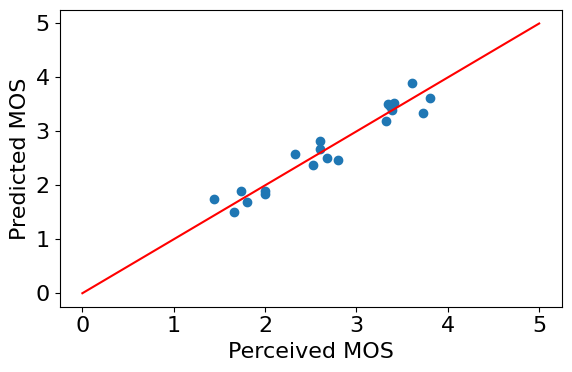

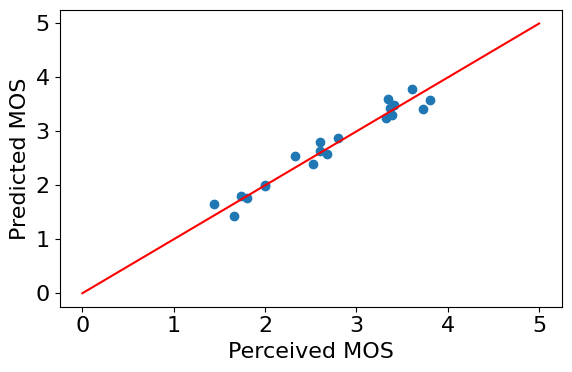

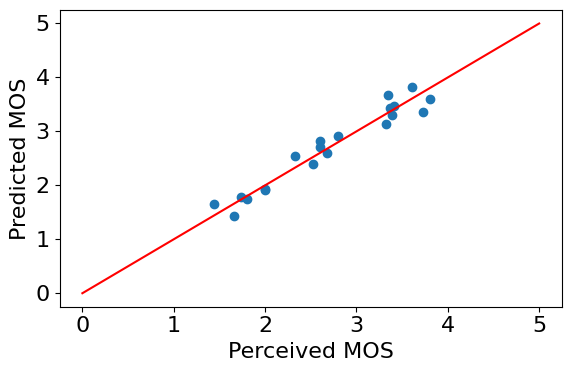

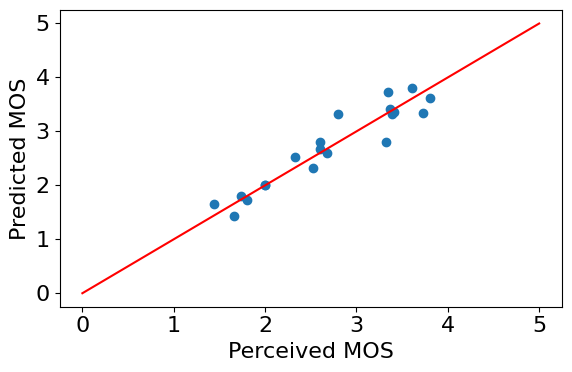

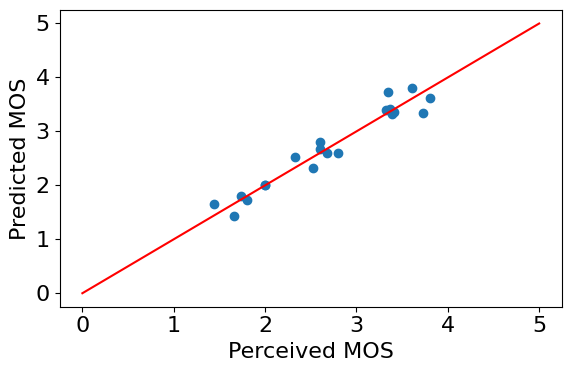

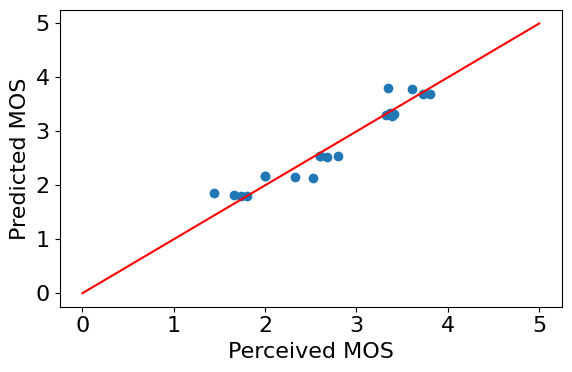

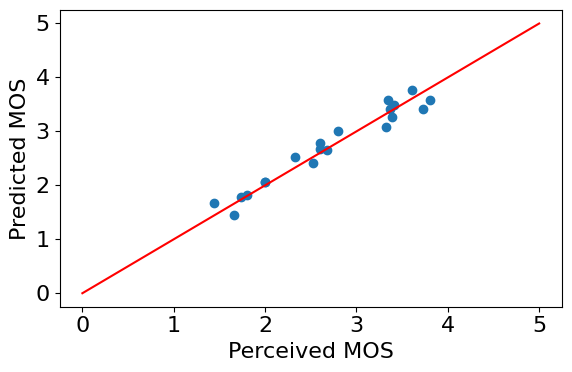

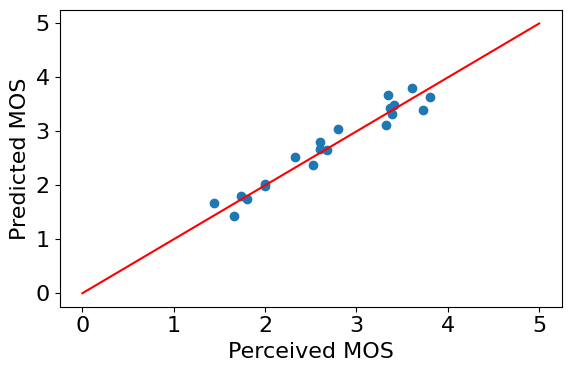

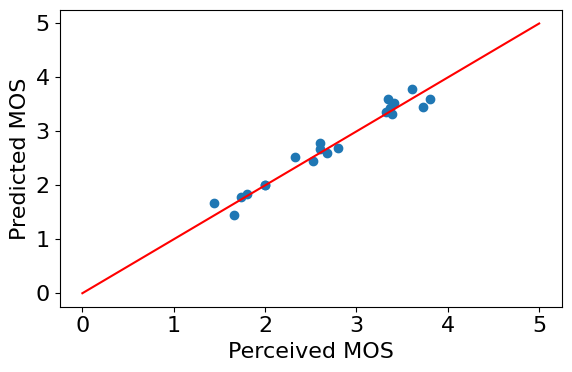

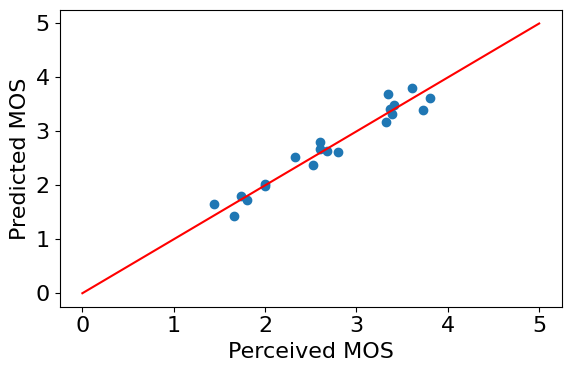

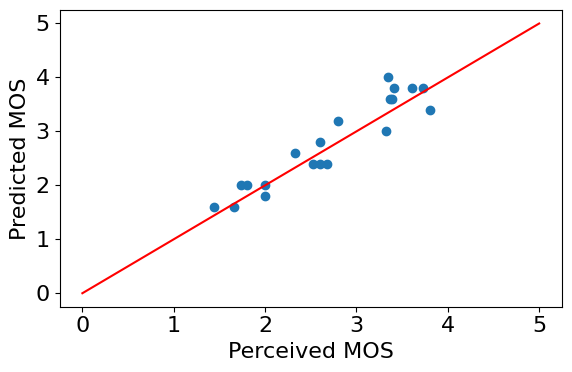

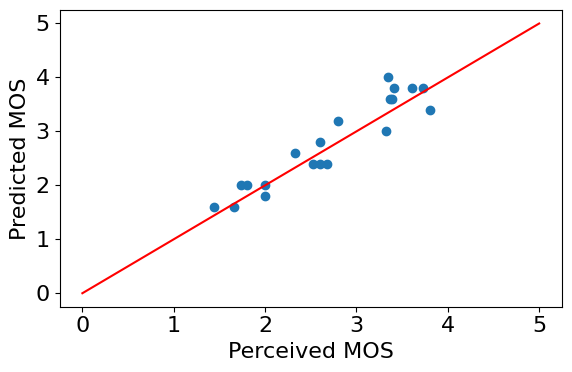

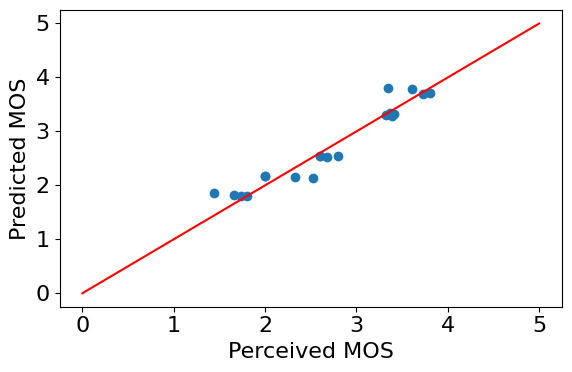

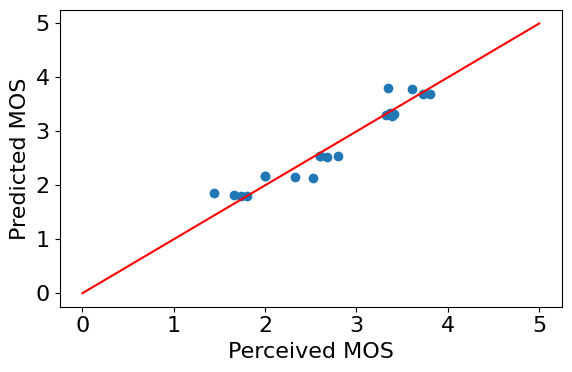

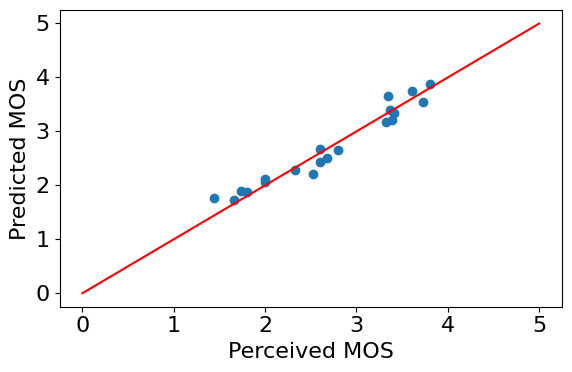

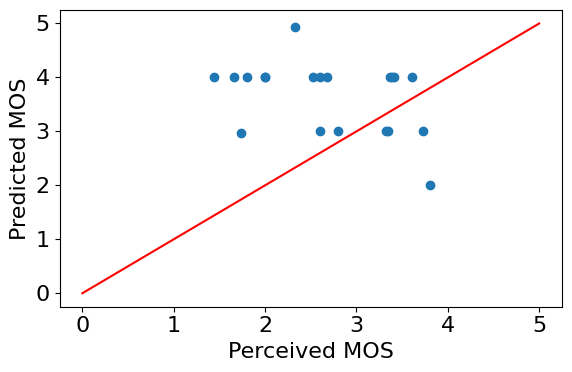

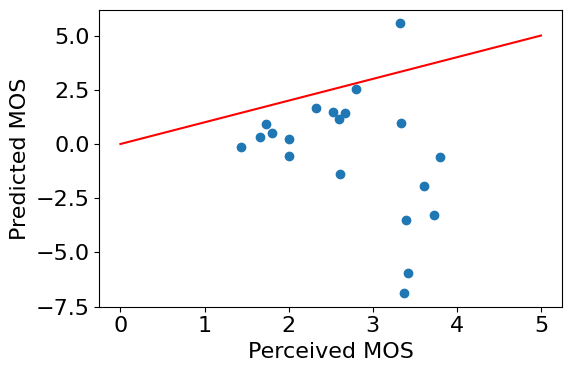

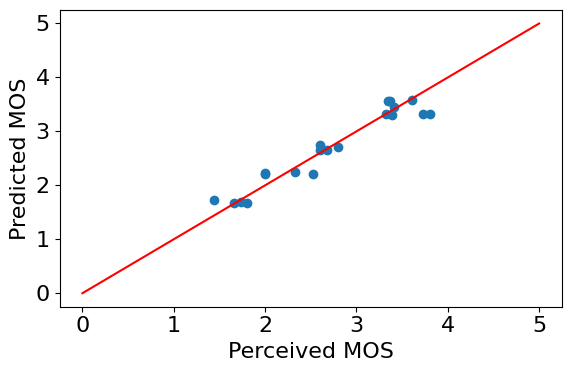

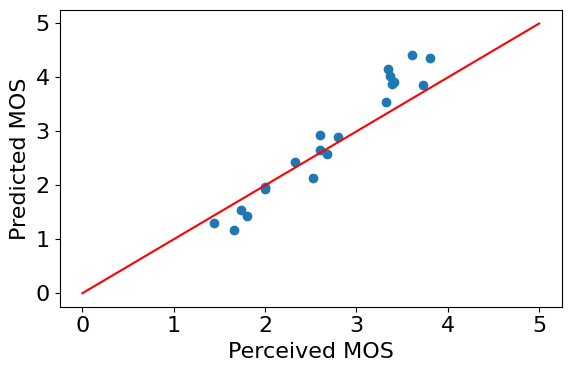

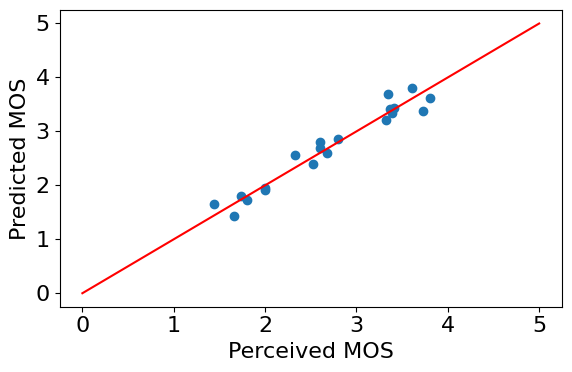

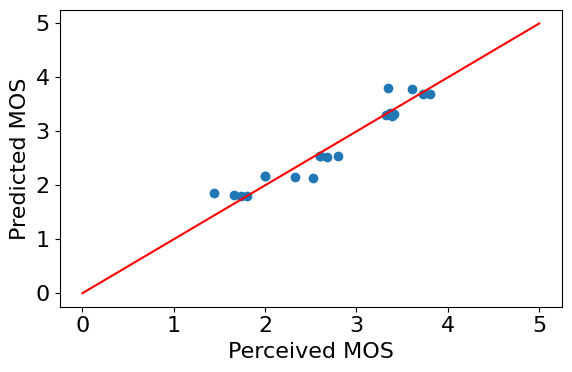

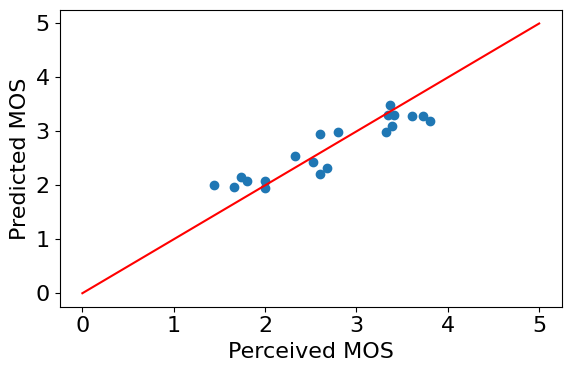

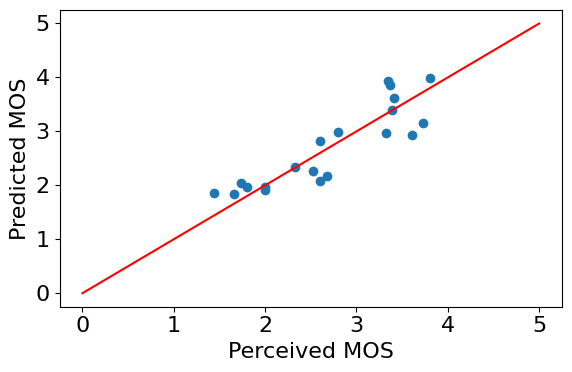

Reporting for codec GPCC_TRISOUP
                             model    r2_score         mse       rmse  \
0                BaggingClassifier    0.967175    0.028934   0.170101   
1           DecisionTreeClassifier    0.964651    0.031159   0.176519   
2            DecisionTreeRegressor    0.964651    0.031159   0.176519   
3                         Pipeline    0.964561    0.031238   0.176744   
4    HistGradientBoostingRegressor    0.963749    0.031954   0.178757   
5        GradientBoostingRegressor    0.962472    0.033079   0.181877   
6                 BaggingRegressor    0.962288    0.033242   0.182324   
7            RandomForestRegressor    0.961557    0.033886   0.184081   
8                AdaBoostRegressor    0.954110    0.040451   0.201123   
9   HistGradientBoostingClassifier    0.947750    0.046057   0.214609   
10      GradientBoostingClassifier    0.942095    0.051041   0.225924   
11              LogisticRegression    0.929882    0.061806   0.248609   
12                

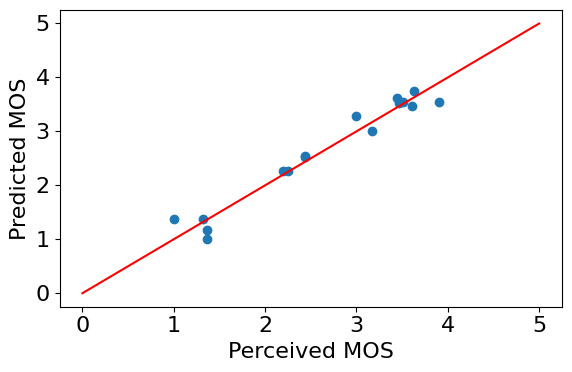

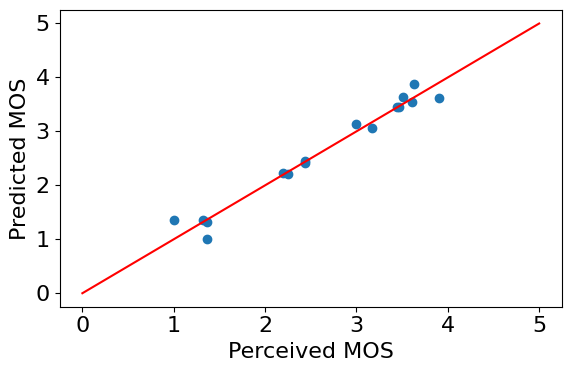

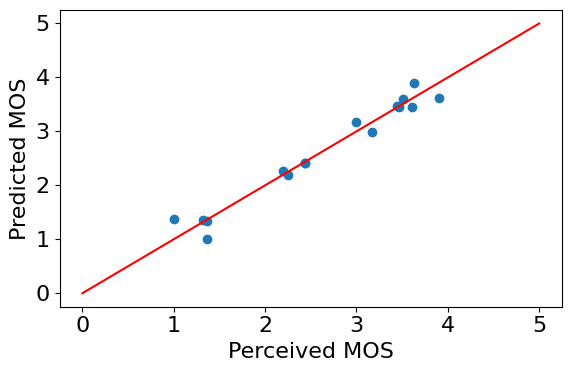

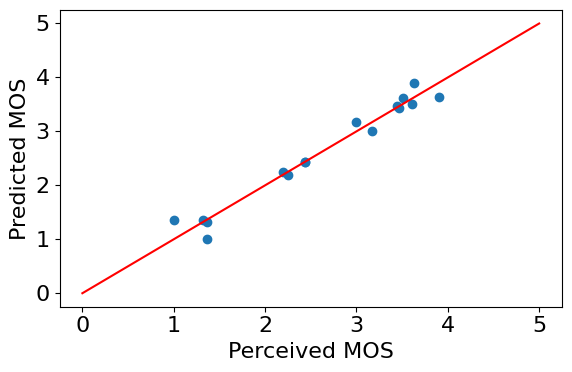

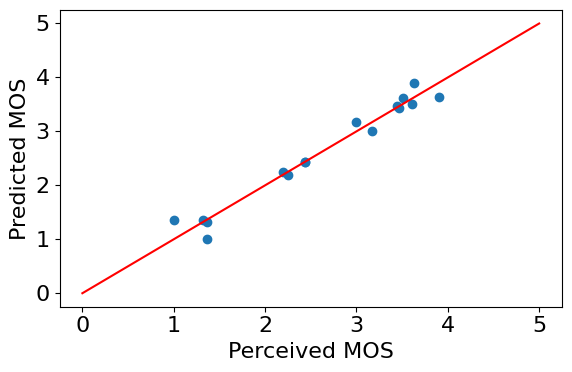

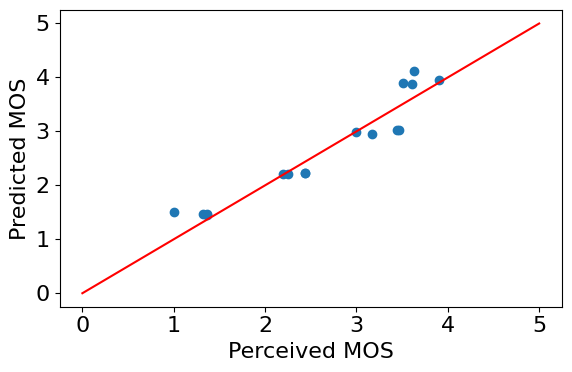

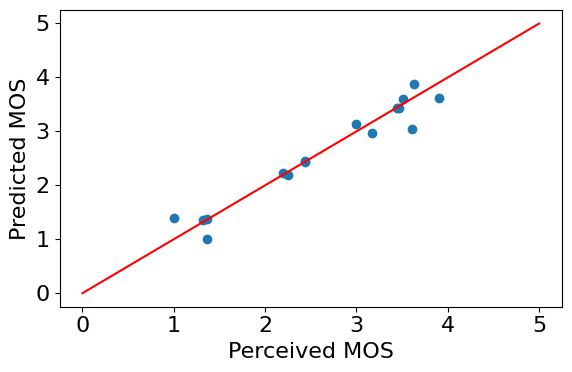

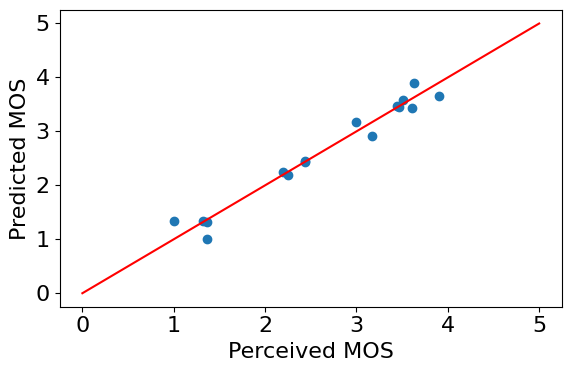

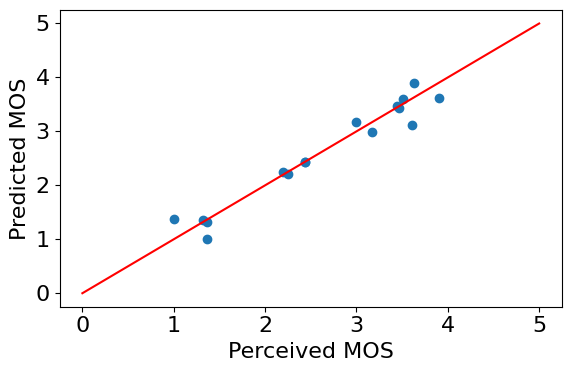

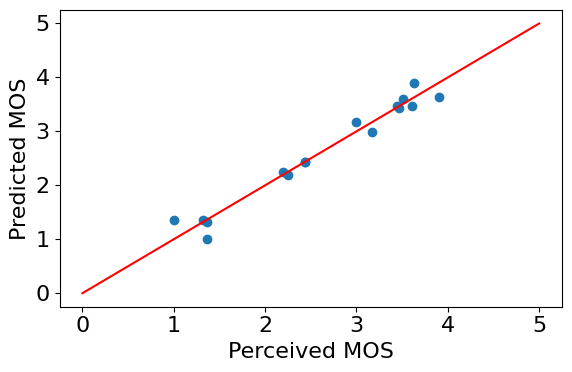

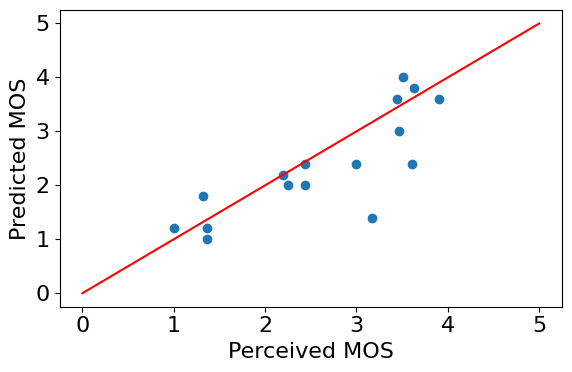

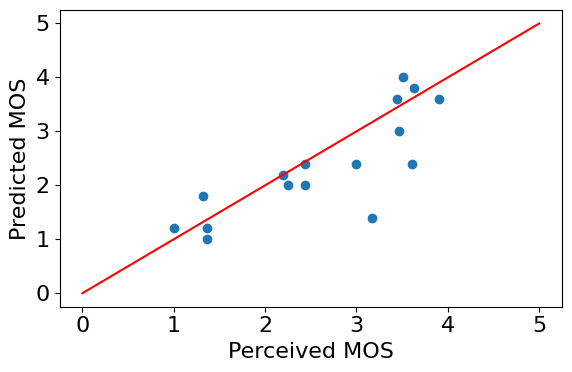

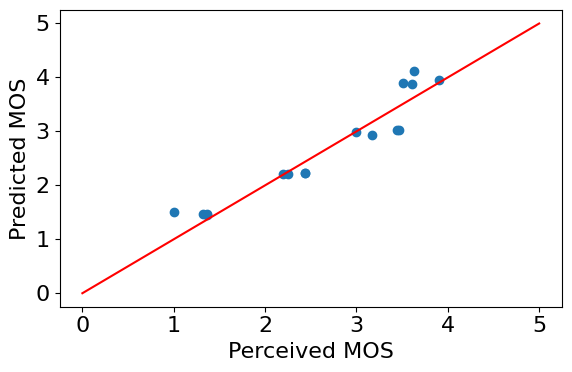

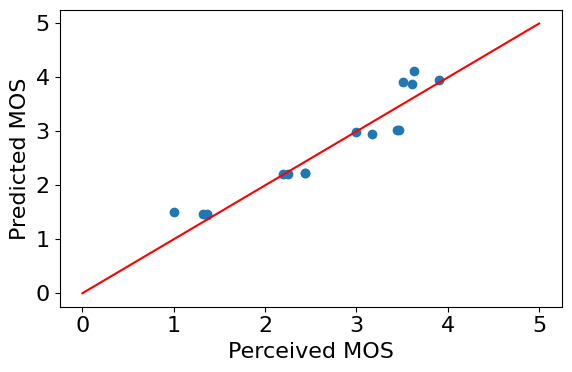

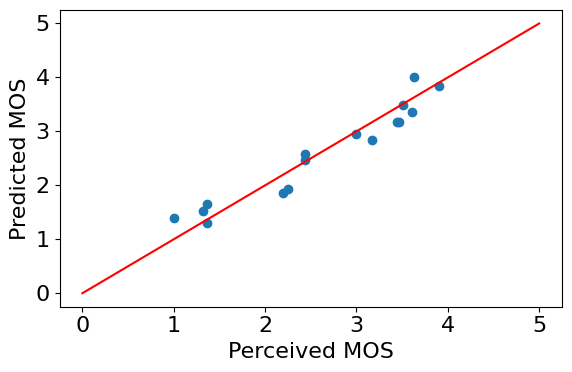

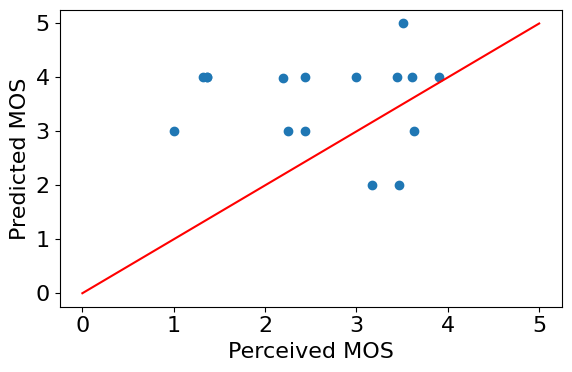

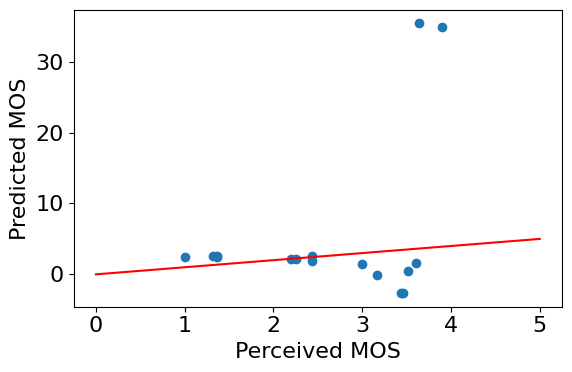

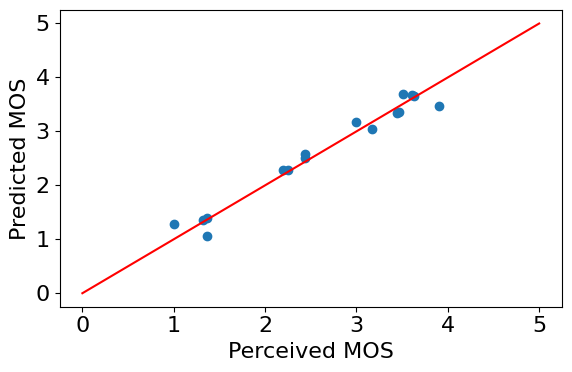

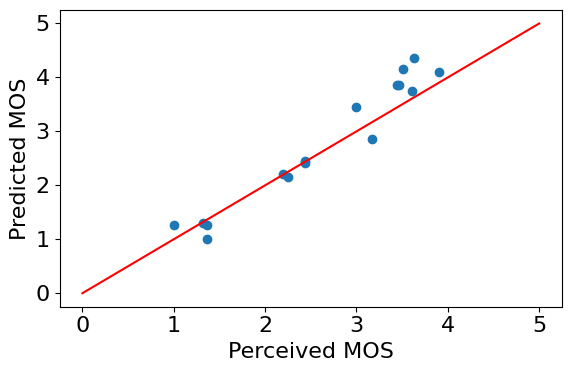

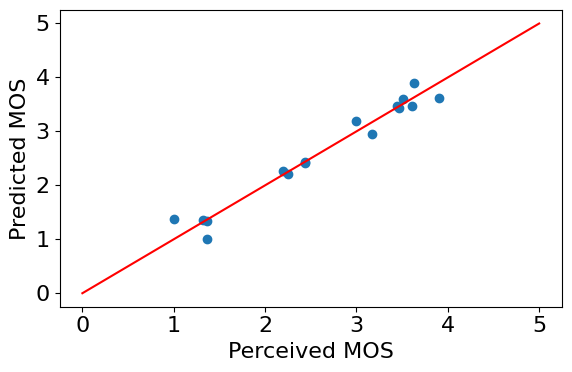

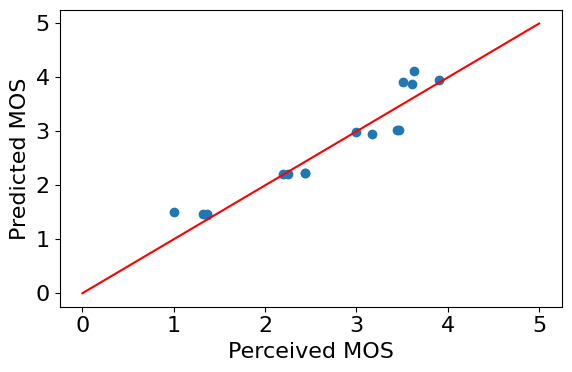

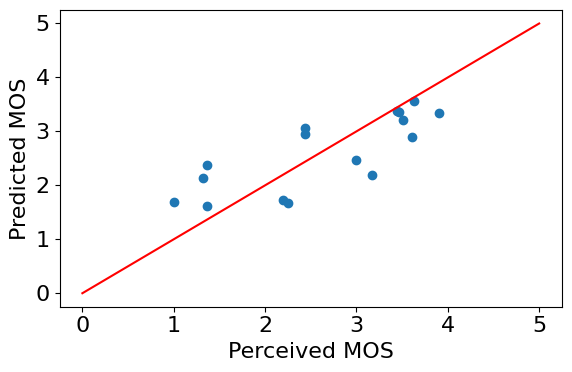

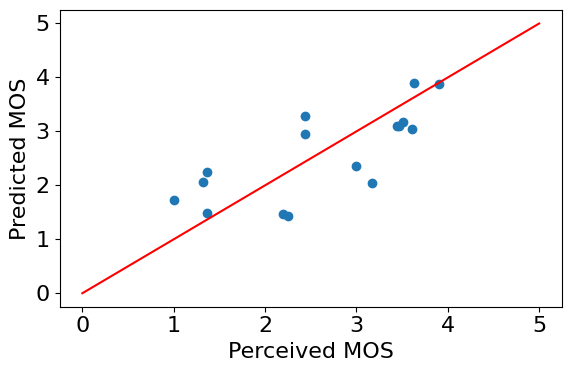

Reporting for codec GPCC_OCTREE
                             model   r2_score        mse      rmse       mae
0            RandomForestRegressor   0.929809   0.048853  0.221028  0.174719
1                 BaggingRegressor   0.924004   0.052894  0.229987  0.183426
2                BaggingClassifier   0.921527   0.054618  0.233705  0.181825
3                            Lasso   0.920901   0.055054  0.234635  0.210012
4                       ElasticNet   0.920896   0.055057  0.234643  0.209754
5                         Pipeline   0.919427   0.056080  0.236812  0.206166
6       GradientBoostingClassifier   0.918631   0.056633  0.237978  0.194510
7   HistGradientBoostingClassifier   0.917504   0.057418  0.239620  0.191903
8    HistGradientBoostingRegressor   0.917106   0.057695  0.240198  0.191573
9           DecisionTreeClassifier   0.917089   0.057707  0.240223  0.191542
10           DecisionTreeRegressor   0.917089   0.057707  0.240223  0.191542
11                           Ridge   0.91647

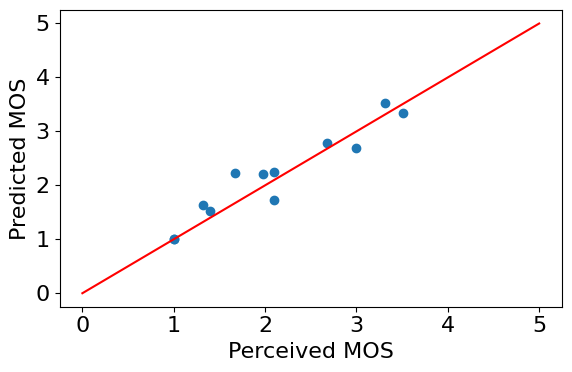

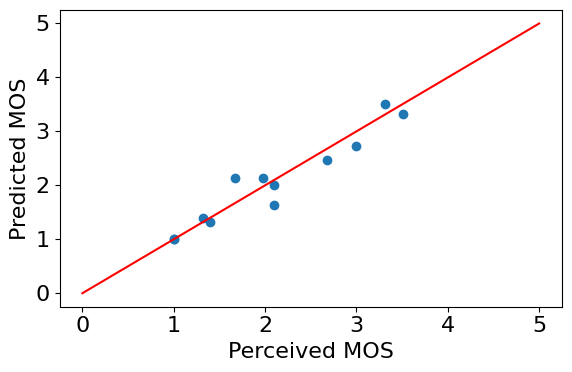

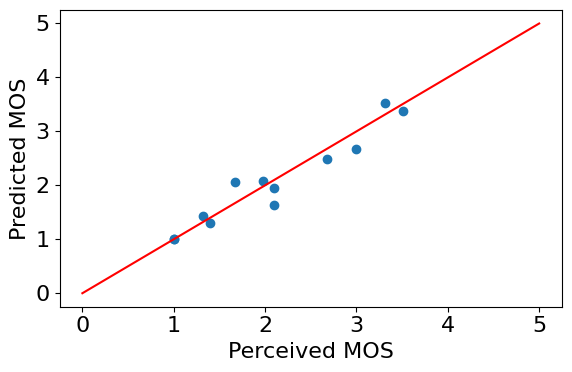

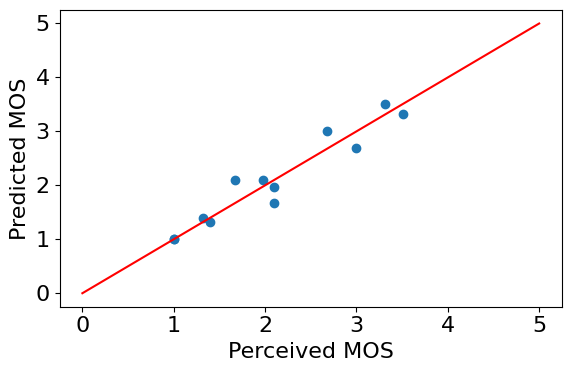

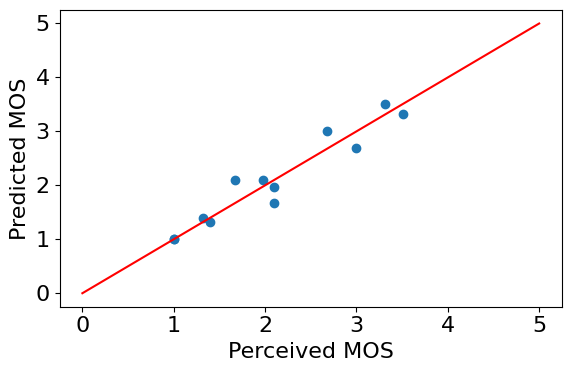

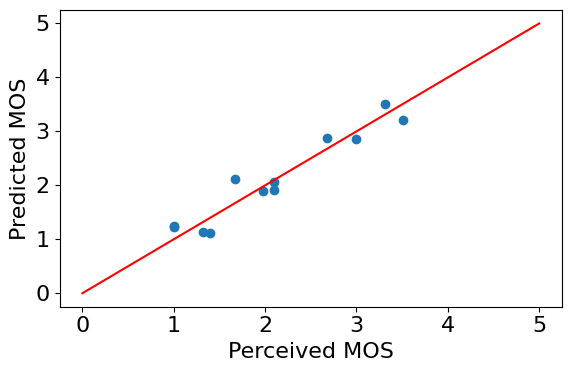

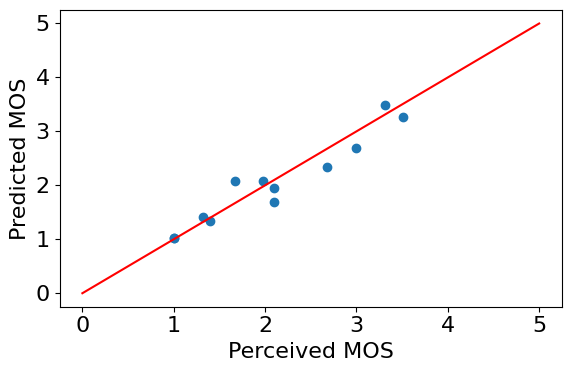

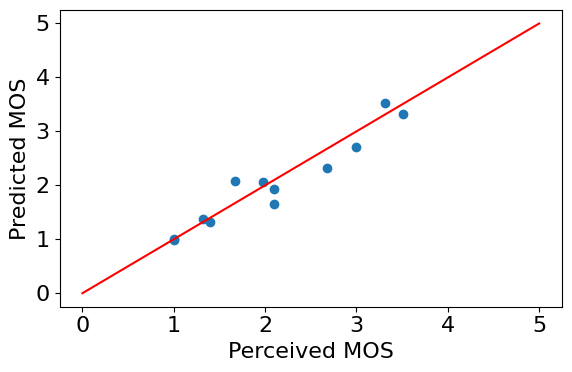

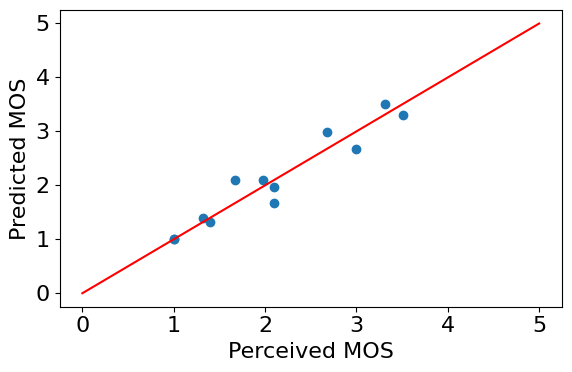

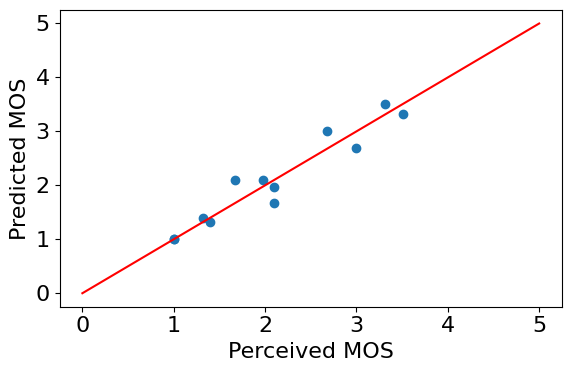

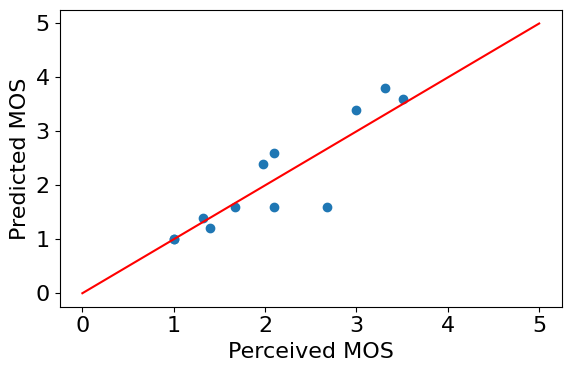

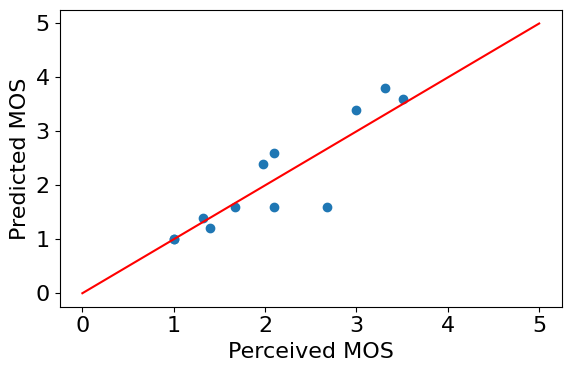

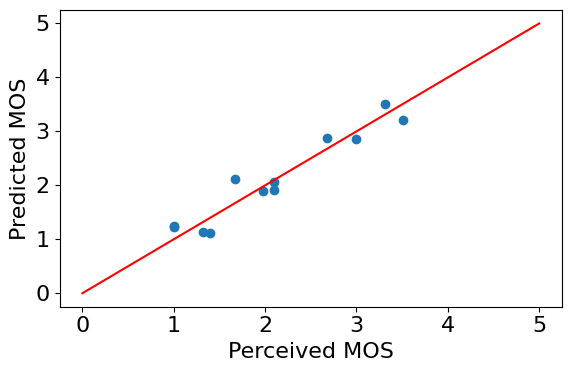

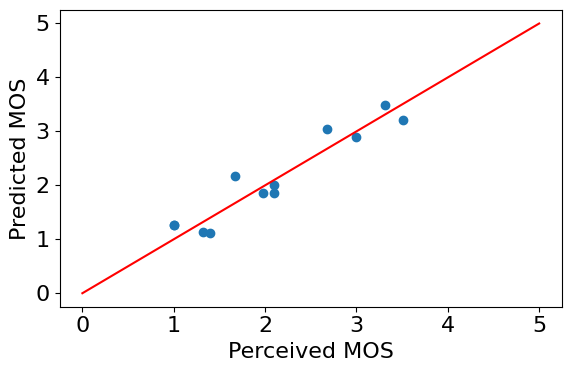

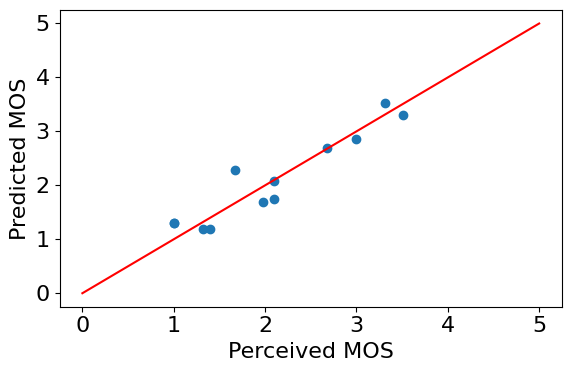

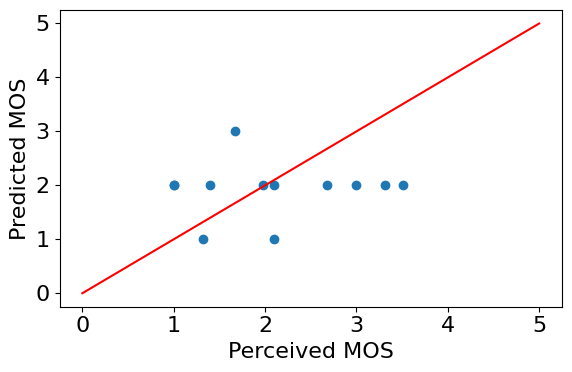

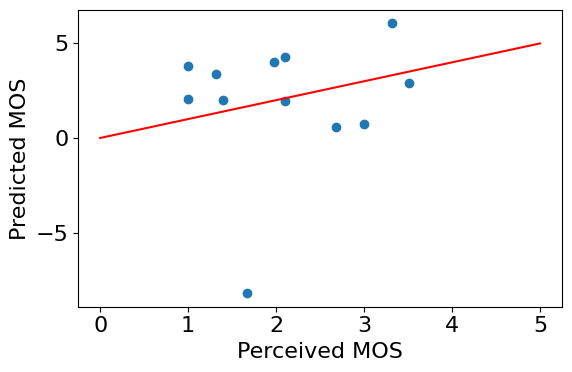

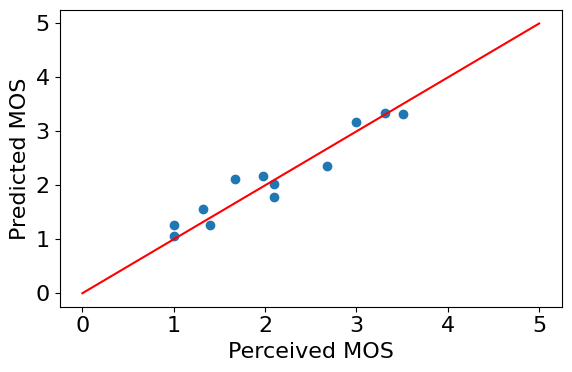

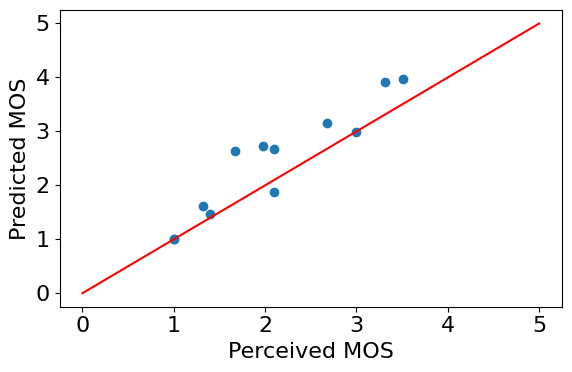

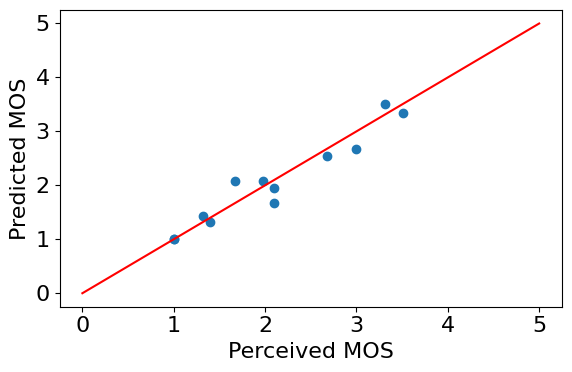

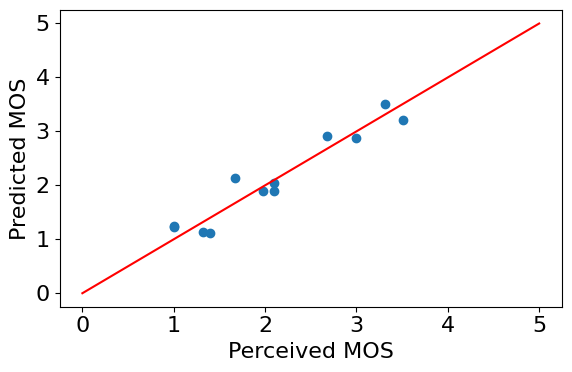

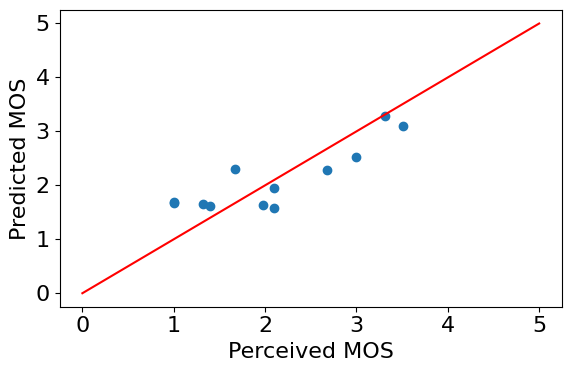

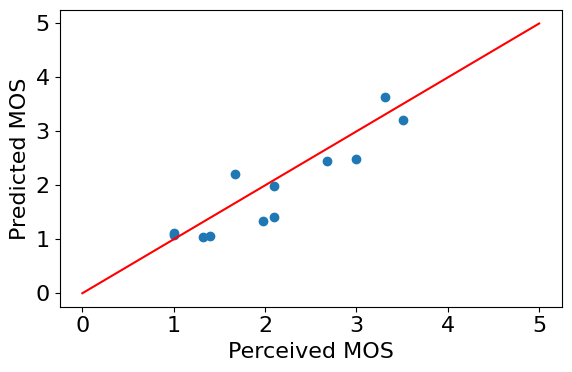

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score as R2
import math

REPORTS = [report_vpcc, report_gpcc_octree, report_gpcc_trisoup]

for codec, report in zip(CODECS, REPORTS):
    print("Reporting for codec " + str(codec))

    model_performance = None

    for model, group_content in report.groupby("model"):
        single_model_performance = pd.DataFrame(
            data=[
                [
                    model,
                    R2(group_content["true_mos"], group_content["predicted_mos"]),
                    mean_squared_error(
                        group_content["true_mos"], group_content["predicted_mos"]
                    ),
                    math.sqrt(
                        mean_squared_error(
                            group_content["true_mos"], group_content["predicted_mos"]
                        )
                    ),
                    mean_absolute_error(
                        group_content["true_mos"], group_content["predicted_mos"]
                    ),
                ]
            ],
            columns=["model", "r2_score", "mse", "rmse", "mae"],
        )
        model_performance = pd.concat(
            [model_performance, single_model_performance], axis=0, ignore_index=True
        )

    model_performance = model_performance.sort_values(
        ["r2_score", "mse", "mae"], ascending=False
    ).reset_index(drop=True)
    print(model_performance)

    now = datetime.now()

    report.to_csv(
        "results_shivi"
        + "/"
        + "performance_per_model_SHIVI_"
        + codec
        + "_"
        + now.strftime("%Y%m%d_%H%M%S")
        + ".csv",
        index=False,
    )
    model_performance.to_csv(
        "results_shivi"
        + "/"
        + "models_scores_SHIVI_"
        + codec
        + "_"
        + now.strftime("%Y%m%d_%H%M%S")
        + ".csv",
        index=False,
    )

    # plt.rcParams.update({"font.size": 16})

    # for model, group_content in report.groupby("model"):
    #     # Generate the scatter plot
    #     plt.figure(figsize=(6, 4))
    #     plt.scatter(group_content["true_mos"], group_content["predicted_mos"])

    #     # Add y=x line to the plot
    #     plt.plot([0, 5], [0, 5], color="red")

    #     # Label the axes
    #     plt.xlabel("Perceived MOS")
    #     plt.ylabel("Predicted MOS")
    #     plt.tight_layout()
    #     plt.savefig(
    #         "./figures/predicted_and_true_distribution_"
    #         + model
    #         + codec
    #         + "_"
    #         + now.strftime("%Y%m%d_%H%M%S")
    #         + ".pdf"
    #     )
    #     plt.show()

## Feature Importance Analysis

### VPCC

In [92]:
# Not all models have feature importance built-in, thus we cannot get it from all the models


vpcc_feature_importance_model = [
    GradientBoostingClassifier(
        learning_rate=0.05,
        max_depth=3,
        n_estimators=100,
        subsample=0.8,
        random_state=seed,
    ),
    # RandomForestRegressor(
    #     n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=seed
    # ),
    # GradientBoostingRegressor(
    #     n_estimators=100,
    #     learning_rate=0.1,
    #     max_depth=3,
    #     subsample=0.8,
    #     random_state=seed,
    # ),
    # DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, random_state=seed),
    # AdaBoostRegressor(
    #     estimator=DecisionTreeRegressor(max_depth=3),
    #     n_estimators=50,
    #     learning_rate=1.0,
    #     random_state=seed,
    # ),
    # DecisionTreeClassifier(
    #     max_depth=8, min_samples_leaf=5, random_state=seed,
    # ),
]

# vpcc
# g_qp, t_qp, bitrate

print("VPCC FEATURE IMPORTANCE")

vpcc_dict = {
    "G-QP": [],
    "T-QP": [],
    "Bitrate": [],
}

vpcc_feature_importances = pd.DataFrame(vpcc_dict)

for group_name in groups_vpcc.groups.keys():
    x_train, y_train, x_test, y_test = get_train_test_fold(groups_vpcc, group_name)
    for model in vpcc_feature_importance_model:
        #print("CURRENT MODEL: " + str(model.__class__.__name__))
        model.fit(x_train, y_train)

        # result is the MOS prediction
        mos_prediction = model.predict(x_test)

        results = pd.DataFrame(mos_prediction, columns=["predicted_mos"])
        results["test_configuration"] = str(group_name)
        results["model"] = model.__class__.__name__
        results["true_mos"] = y_test
        results["predicted_mos"] = float(mos_prediction)
        results["mse"] = mean_squared_error(
            results["true_mos"], results["predicted_mos"]
        )

        vpcc_feature_importances.loc[len(vpcc_feature_importances.index)] = model.feature_importances_

        #current_report = pd.concat(
        #    [current_report, results], axis=0, ignore_index=True
        #)

# current_report

vpcc_feature_importances

VPCC FEATURE IMPORTANCE


/tmp/ipykernel_26357/1675295297.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/1675295297.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/1675295297.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/1675295297.py:60: DeprecationWarning: Conversi

,G-QP,T-QP,Bitrate
0,0.168241,0.260053,0.571706
1,0.236305,0.209323,0.554372
2,0.243024,0.227708,0.529268
3,0.283181,0.168544,0.548275
4,0.235508,0.204467,0.560025
5,0.189820,0.248855,0.561325
6,0.211519,0.183689,0.604792
7,0.226049,0.217725,0.556225
8,0.194992,0.208770,0.596239
9,0.243012,0.236267,0.520721


In [93]:
vpcc_feature_importances.mean()

G-QP       0.218581
T-QP       0.216771
Bitrate    0.564648
dtype: float64

In [94]:
# import numpy as np

# plt.rcParams.update({'font.size': 40})
# fig, ax = plt.subplots(figsize=(16,12))
# plt.bar(np.arange(vpcc_feature_importances.shape[1]),
#         vpcc_feature_importances.mean(),
#         # yerr=[vpcc_feature_importances.mean()-vpcc_feature_importances.min(), vpcc_feature_importances.max()-vpcc_feature_importances.mean()], capsize=6)
#         # yerr=vpcc_feature_importances.std(),
#         capsize=6)

# # print(np.concatenate((['a'], dict.keys()), axis=0))
# ax.set_xticks(range(len(dict.keys())))
# ax.set_xticklabels(labels=dict.keys(), rotation=30)
# ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
# ax.set_xlabel('Features (VPCC)')

# ax.set_ylabel('Feature Importance Score')
# plt.tight_layout()
# plt.savefig("./figures/feature_importances_" + "VPCC_" + "GradientBoostingClassifier_" + ".pdf")

### GPCC OCTREE

In [95]:
# gpcc octree
# qp, depth, bitrate


gpcc_octree_feature_importance_model = [
    RandomForestRegressor(
        n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=seed
    ),
]

print("GPCC OCTREE FEATURE IMPORTANCE")

gpcc_octree_dict = {
    "QP": [],
    "Depth": [],
    "Bitrate": [],
}

gpcc_octree_feature_importances = pd.DataFrame(gpcc_octree_dict)

for group_name in groups_gpcc_octree.groups.keys():
    x_train, y_train, x_test, y_test = get_train_test_fold(groups_gpcc_octree, group_name)
    for model in gpcc_octree_feature_importance_model:
        #print("CURRENT MODEL: " + str(model.__class__.__name__))
        model.fit(x_train, y_train)

        # result is the MOS prediction
        mos_prediction = model.predict(x_test)

        results = pd.DataFrame(mos_prediction, columns=["predicted_mos"])
        results["test_configuration"] = str(group_name)
        results["model"] = model.__class__.__name__
        results["true_mos"] = y_test
        results["predicted_mos"] = float(mos_prediction)
        results["mse"] = mean_squared_error(
            results["true_mos"], results["predicted_mos"]
        )

        gpcc_octree_feature_importances.loc[len(gpcc_octree_feature_importances.index)] = model.feature_importances_

        #current_report = pd.concat(
        #    [current_report, results], axis=0, ignore_index=True
        #)

# current_report

gpcc_octree_feature_importances


/tmp/ipykernel_26357/4074226190.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/4074226190.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)


GPCC OCTREE FEATURE IMPORTANCE


/tmp/ipykernel_26357/4074226190.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/4074226190.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/4074226190.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/4074226190.py:34: DeprecationWarning: Conversi

,QP,Depth,Bitrate
0,0.311713,0.308273,0.380014
1,0.265589,0.296421,0.437990
2,0.273435,0.302616,0.423949
3,0.281637,0.298232,0.420131
4,0.291992,0.311382,0.396625
5,0.298197,0.311713,0.390090
6,0.297590,0.309872,0.392538
7,0.236113,0.290832,0.473056
8,0.273096,0.308046,0.418858
9,0.275500,0.310311,0.414190


In [96]:
gpcc_octree_feature_importances.mean()

QP         0.278913
Depth      0.304201
Bitrate    0.416886
dtype: float64

In [97]:
# import numpy as np

# plt.rcParams.update({'font.size': 30})
# fig, ax = plt.subplots(figsize=(8,6))
# plt.bar(np.arange(gpcc_octree_feature_importances.shape[1]),
#         gpcc_octree_feature_importances.mean(),
#         # yerr=[gpcc_octree_feature_importances.mean()-gpcc_octree_feature_importances.min(), gpcc_octree_feature_importances.max()-gpcc_octree_feature_importances.mean()], capsize=6)
#         # yerr=gpcc_octree_feature_importances.std(),
#         capsize=6)

# # print(np.concatenate((['a'], dict.keys()), axis=0))
# ax.set_xticks(range(len(dict.keys())))
# ax.set_xticklabels(labels=dict.keys(), rotation=30)
# #ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# ax.set_xlabel('Features (GPCC Oct-Pred)')
# ax.set_ylabel('Feature Importance Score')
# plt.tight_layout()
# plt.savefig("./figures/feature_importances_" + "GPCC_OCTREE_" + "RandomForestRegressor_" + ".pdf")

### GPCC TRISOUP

In [98]:
# gpcc trisoup
# qp, level, bitrate


gpcc_trisoup_feature_importance_model = [
    DecisionTreeClassifier(
         max_depth=8, min_samples_leaf=5, random_state=seed,
     ),
]

print("GPCC TRISOUP FEATURE IMPORTANCE")

gpcc_trisoup_dict = {
    "QP": [],
    "Level": [],
    "Bitrate": [],
}

gpcc_trisoup_feature_importances = pd.DataFrame(gpcc_trisoup_dict)

for group_name in groups_gpcc_trisoup.groups.keys():
    x_train, y_train, x_test, y_test = get_train_test_fold(groups_gpcc_trisoup, group_name)
    for model in gpcc_trisoup_feature_importance_model:
        #print("CURRENT MODEL: " + str(model.__class__.__name__))
        model.fit(x_train, y_train)

        # result is the MOS prediction
        mos_prediction = model.predict(x_test)

        results = pd.DataFrame(mos_prediction, columns=["predicted_mos"])
        results["test_configuration"] = str(group_name)
        results["model"] = model.__class__.__name__
        results["true_mos"] = y_test
        results["predicted_mos"] = float(mos_prediction)
        results["mse"] = mean_squared_error(
            results["true_mos"], results["predicted_mos"]
        )

        gpcc_trisoup_feature_importances.loc[len(gpcc_trisoup_feature_importances.index)] = model.feature_importances_

        #current_report = pd.concat(
        #    [current_report, results], axis=0, ignore_index=True
        #)

# current_report

gpcc_trisoup_feature_importances


/tmp/ipykernel_26357/3393272855.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3393272855.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)


GPCC TRISOUP FEATURE IMPORTANCE


/tmp/ipykernel_26357/3393272855.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3393272855.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3393272855.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_26357/3393272855.py:34: DeprecationWarning: Conversi

,QP,Level,Bitrate
0,0.233912,0.651287,0.114801
1,0.236105,0.648931,0.114964
2,0.224934,0.659022,0.116045
3,0.225962,0.658236,0.115802
4,0.262383,0.584626,0.152991
5,0.249574,0.674241,0.076185
6,0.228420,0.660198,0.111382
7,0.236114,0.590904,0.172982
8,0.205015,0.683820,0.111165
9,0.190141,0.693976,0.115882


In [99]:
gpcc_trisoup_feature_importances.mean()

QP         0.238399
Level      0.643477
Bitrate    0.118124
dtype: float64

### GRAPHS

In [100]:
def get_feature_importance_and_dict(codec):
    if "VPCC" in codec:
        return (vpcc_feature_importances, vpcc_dict)
    elif "GPCC_OCTREE" in codec:
        return (gpcc_octree_feature_importances, gpcc_octree_dict)
    elif "GPCC_TRISOUP" in codec:
        return (gpcc_trisoup_feature_importances, gpcc_trisoup_dict)
    else:
        raise Exception("Invalid codec used!!!")

def get_feature_importance_graph_filename(codec):
    if "VPCC" in codec:
        return "VPCC_" + "GradientBoostingClassifier_"
    elif "GPCC_OCTREE" in codec:
        return "GPCC_OCTREE_" + "RandomForestRegressor_"
    elif "GPCC_TRISOUP" in codec:
        return "GPCC_TRISOUP_" + "DecisionTreeClassifier_"
    else:
        raise Exception("Invalid codec used!!!")
    
def get_x_axis_name(codec):
    if "VPCC" in codec:
        return "Features (VPCC)"
    elif "GPCC_OCTREE" in codec:
        return "Features (GPCC-Oct-Pred)"
    elif "GPCC_TRISOUP" in codec:
        return "Features (GPCC-Tri-RAHT)"
    else:
        raise Exception("Invalid codec used!!!")

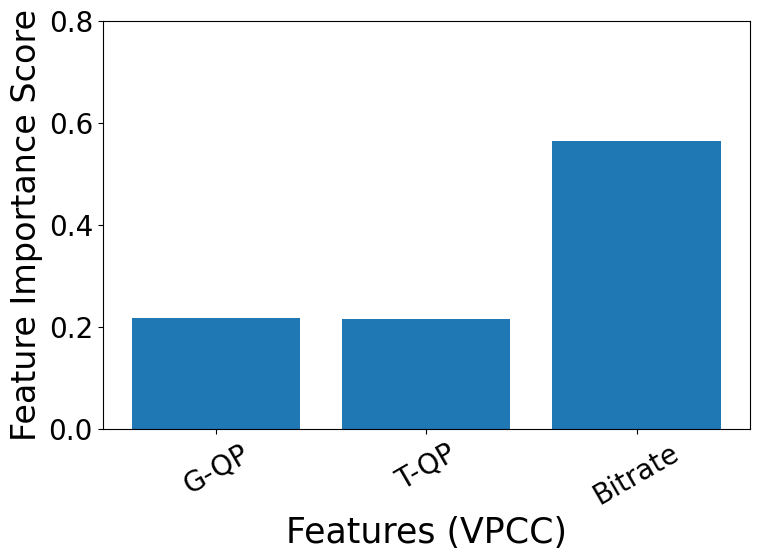

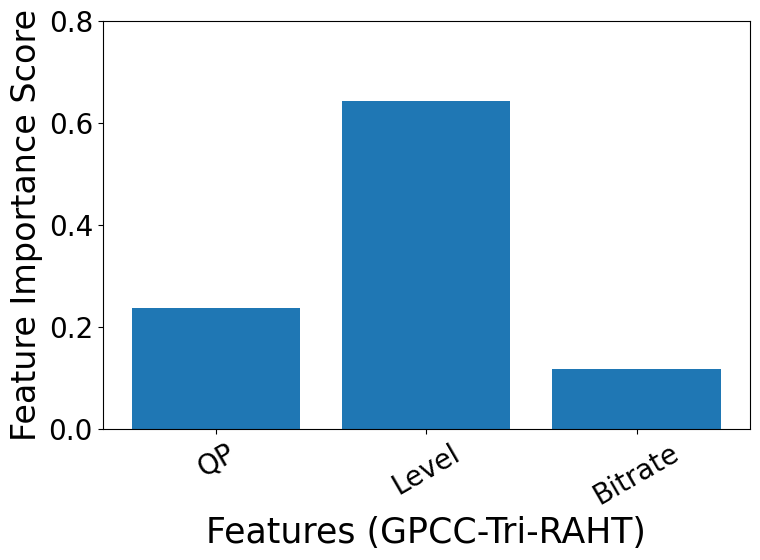

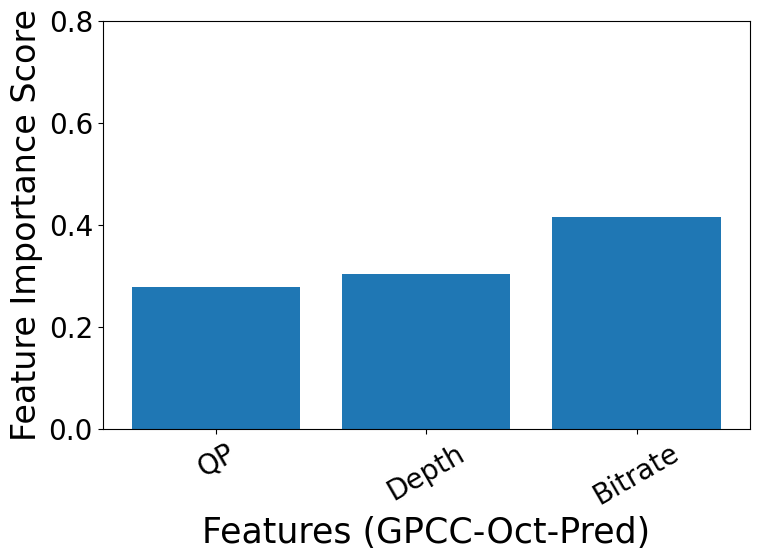

In [114]:
import numpy as np

for codec in CODECS:
        plt.rcParams.update({'font.size': 20})
        fig, ax = plt.subplots(figsize=(8,6))
        feature_importance, dict = get_feature_importance_and_dict(codec)
        plt.bar(np.arange(feature_importance.shape[1]),
                feature_importance.mean(),
                # yerr=[feature_importance.mean()-feature_importance.min(), feature_importance.max()-feature_importance.mean()], capsize=6)
                # yerr=feature_importance.std(),
                capsize=6)

        # print(np.concatenate((['a'], dict.keys()), axis=0))
        ax.set_xticks(range(len(dict.keys())))
        ax.set_xticklabels(labels=dict.keys(), rotation=30, fontsize=20)
        ax.set_yticks([0.0, 0.2,0.4, 0.6, 0.8])
        ax.set_xlabel(get_x_axis_name(codec), fontsize=25)
        ax.set_ylabel('Feature Importance Score', fontsize=24)
        plt.tight_layout()
        plt.savefig("./figures/feature_importances_" + get_feature_importance_graph_filename(codec) + ".pdf")

## Parameter Tuning